In [1]:
# sc.install_pypi_package("pip==22.0.3")
# sc.install_pypi_package("pandas==0.25.1")
# sc.install_pypi_package("matplotlib==3.1.1")
# sc.install_pypi_package("IPython")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>''')

# Nights at the Museum: Exploring the Smithsonian Open Access Data Repository

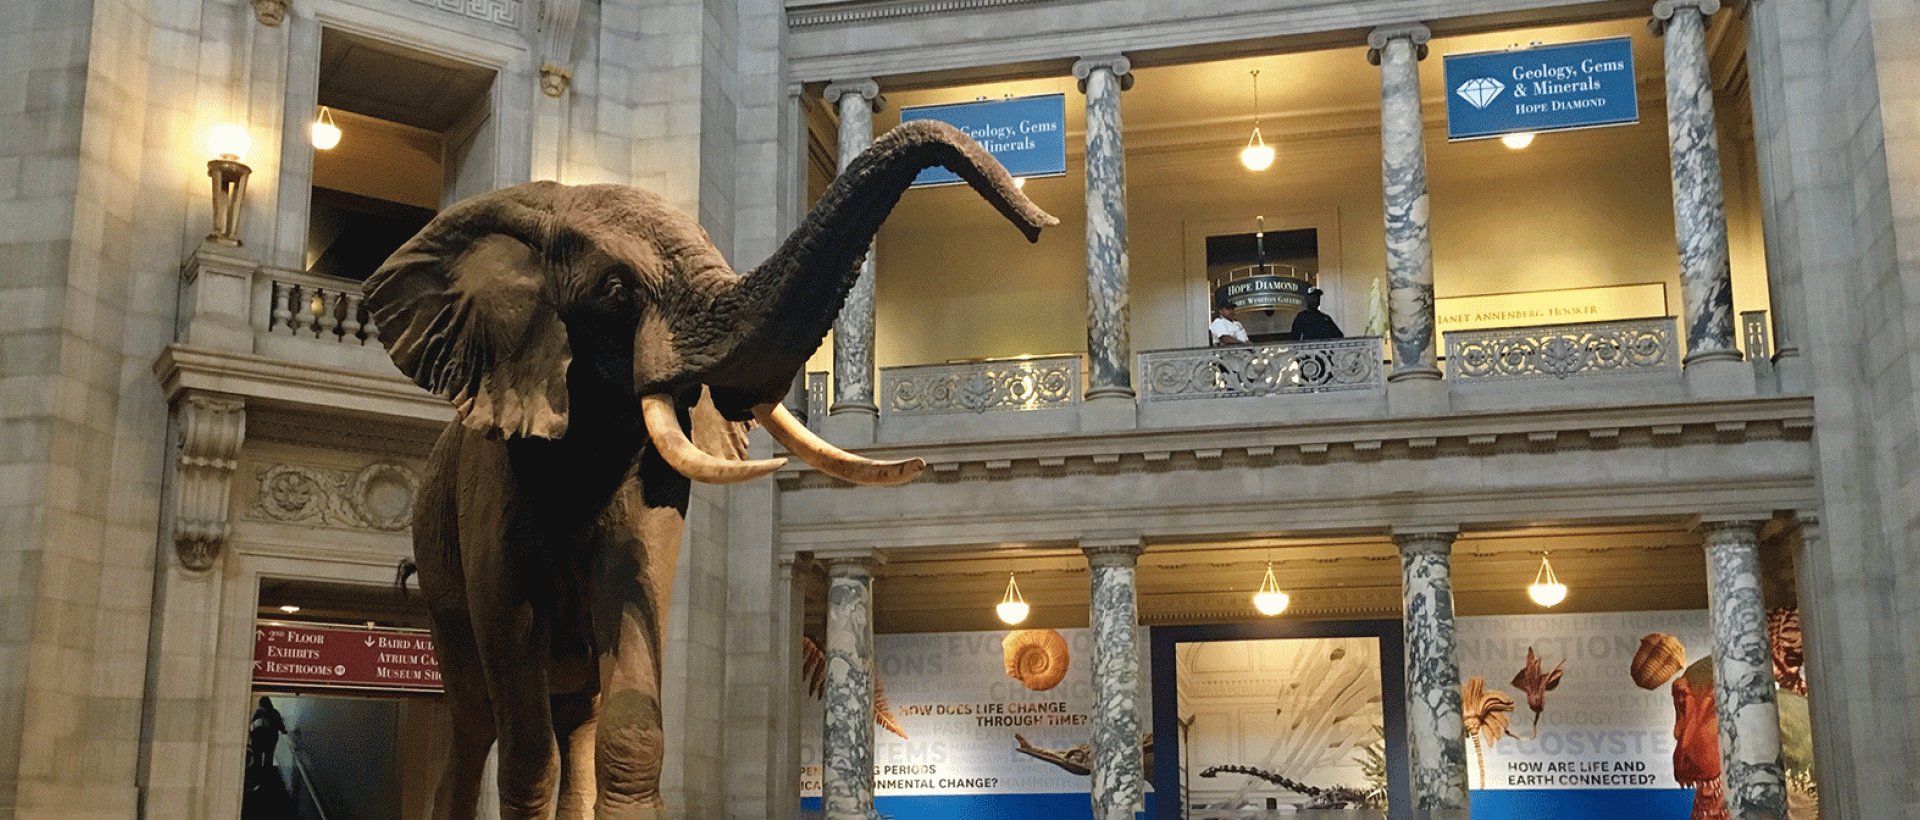

## Executive Summary

The Smithsonian Open Access is an initiative by the Smithsonian Institute that allows people to download, explore, share, and reuse millions of digital items from the Smithsonian collection. The Smithsonian is the world’s largest museum which aims to increase and diffuse knowledge. They hope that with this initiative, it will introduce their collections to new audiences, engage with the public, and provide critical context for pressing concerns of the twenty-first century. The proponents seek to leverage this opportunity to browse, classify, and summarize the institute's vast catalog and along the way pick up new learnings and insights.

Amazon Web Services (AWS), a cloud computing platform, was utilized in the exploration of this database. With Amazon Elastic MapReduce (EMR), a cloud big data platform that uses open-source analytics frameworks, handling and analysis of big data can be made more efficient. To be able to provide summary statistics, Exploratory Data Analysis was used, and the results were generated using Spark dataframe queries with plots to aid in visualization.

While analyzing large amounts of data is difficult, it is not impossible. Although visiting the museum in person is not always feasible, information technology allows enthusiasts to search the institution's archives and peruse its digital material. In addition to fulfilling one's curiosity, one learns about the Smithsonian's research priorities; for example, cultures in the Americas appear to be well-studied and represented in the database, although the same cannot be said for cultures in more distant parts of the world, such as Asia.

Through this exploration, the proponents were able to humbly provide a few recommendations to the Smithsonian to improve the diversity and accessibility of its collections. The analysts also propose some areas for further study such as exploring other categories and fields of the database, and expanding the analysis to other museums apart from the National Museum of Natural History (NMNH), in which this study is mainly focused on.

## Introduction and Problem Statement

The **Smithsonian Institute**, or simply **the Smithsonian**, is easily the world’s largest museum, in addition to being a vital education and research complex in multiple fields, from art and design, to history and culture, to science and nature. It is home to **19 museums, 9 research centers, libraries, archives, and the National Zoo**, all of which are working to shape the future by preserving heritage, developing new knowledge, and sharing resources with the rest of the world. The institute is named after James Smithson, a British scientist who was the institute's first benefactor. It was founded as the "United States National Museum", but that name was dropped from the administrative register in 1967. The National Mall in Washington, D.C., an open-area national park, is home to 11 of the 19 Smithsonian Institution museums and galleries. *(Wikipedia contributors, 2022)*

There are **156 million** artworks, artifacts, and specimens in the Smithsonian collection. The National Museum of Natural History, alone, has 145 million of these specimens and artifacts, the majority of which are Formaldehyde-preserved animals. As such, Smithsonian hosts a vast database of metadata regarding its collection objects through its **Open Access Initiative**, to promote _“centralized avenues of re-use, search and discovery, machine processing, and more”_. The Smithsonian's digital assets, whether developed, stored, or maintained, are readily accessible through this initiative. Text, still photographs, sound recordings, research datasets, 3D models, collections data, and other types of data may be included.

The proponents seek to leverage this opportunity to browse, classify, and summarize this data behind the museum’s impressive collection, with the repository already providing remote access to over 11 million objects and specimens. Through data exploration and descriptive statistics, the team proposes to answer the following questions:

- **How might we access the open data repository of the Smithsonian Institute, to describe and better understand the vast catalog of collections, artifacts, and items housed by the world’s largest museum?**
<br>
<br>
- **What can we learn from exploring the Smithsonian catalog?**

## Motivation for the Study

The Institution was formed in 1846 with the generous donation of James Smithson (1765–1829), an Englishman who had a vision for the institution, “under the name of the Smithsonian Institution, an establishment for the increase and diffusion of knowledge.” The Smithsonian's aim has been clear since its foundation in 1846: _"the increase and diffusion of knowledge."_ They want to empower individuals all over the world to join them in that mission in new and inventive ways for the twenty-first century. It is to discover a world where everyone can learn, research, explore, and create in ways it could not have been done before the Smithsonian Open Access initiative. They hope that by making their trusted collections more accessible and usable, individuals will be inspired to create new knowledge in order to better comprehend the world — past and present.

The 30 million annual visitors to the Institution are admitted free of charge. It has a USD 1.25 billion yearly budget, with two-thirds of that coming from annual government appropriations. The Institution's endowment, individual and corporate contributions, membership dues, and earned retail, concession, and license fees provide additional funding. The endowment of the Institution had a total value of roughly USD 5.4 billion as of 2021. *(Wikipedia contributors, 2022)*

This study honors the institution's mission by exploring the vast catalog it publicly provides and extracting new learnings and discoveries. By analyzing the Smithsonian database, it can also potentially aid in encouraging others to do the same and discover the world through the Smithsonian, and possibly invite contributors. 

## Methodology

To analyze a large database such as the Smithsonian Open Access, the analysts opted to utilize **Amazon Web Services (AWS)**, a subsidiary of Amazon that provides on-demand cloud computing platforms. AWS is the most comprehensive and widely used cloud platform in the world, with over 200 fully featured services available. It is used by millions of clients, including the fastest-growing startups, largest corporations, and top government agencies, to reduce costs, improve agility, and accelerate innovation. AWS is designed to be the most adaptable and secure cloud computing platform on the market today. Its fundamental infrastructure is designed to meet the security needs of the military, global banks, and other high-profile entities.

Specifically, the analysts used **Amazon Elastic MapReduce (EMR)**. It is a cloud big data platform that uses open-source analytics frameworks like Apache Spark to conduct large-scale distributed data processing jobs, interactive SQL queries, and machine learning (ML) applications. *(Amazon Web Services, 2022)*

Below is a summary of the methodology used:

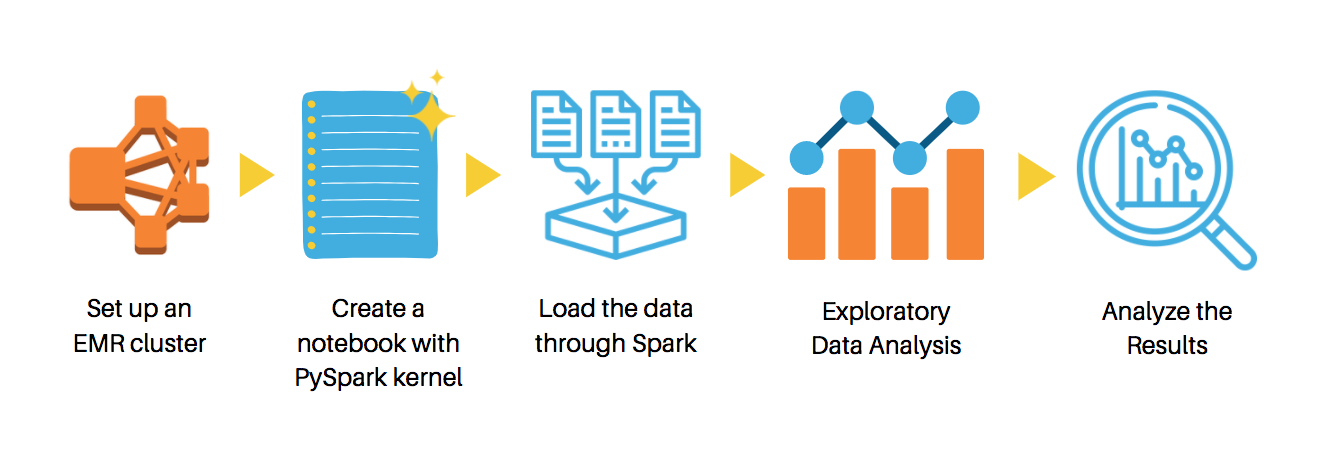

<center><span style="font-size:12px;color:gray"><b>Figure 1. </b>Methodology for the Exploration of the Smithsonian Open Access</span></center>

1. **Set up an EMR cluster in AWS**

The cluster and jupyter notebook was created using EMR 6.5.0 to be able to utilize the latest version of PySpark.

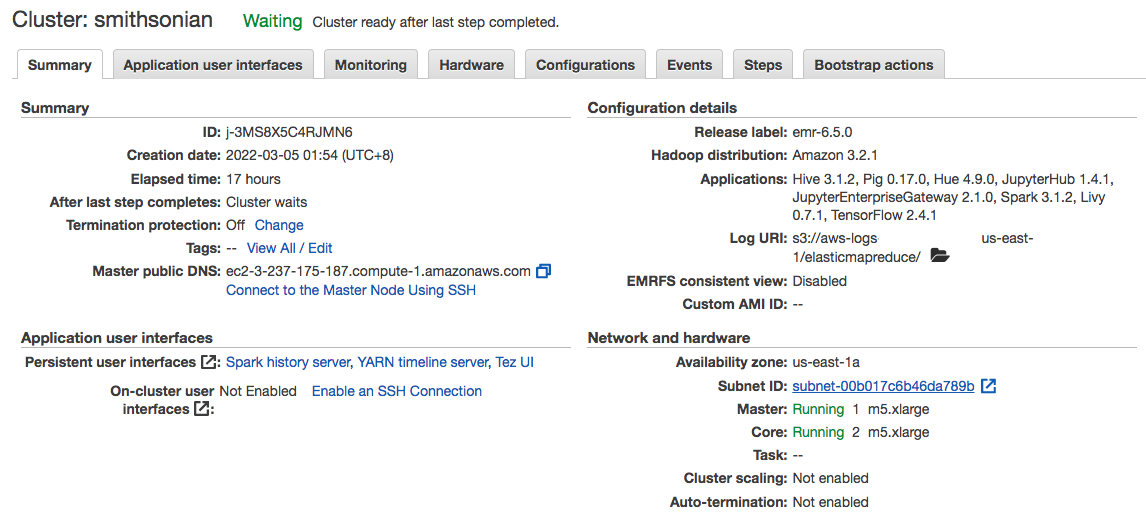

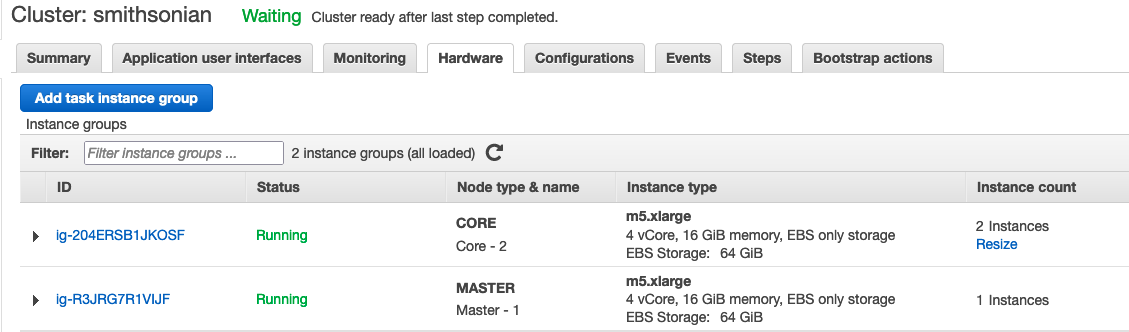

2. **Create a jupyter notebook with a PySpark kernel**

PySpark kernel was used to be able to do parallel executions and be able to process big data more efficiently.

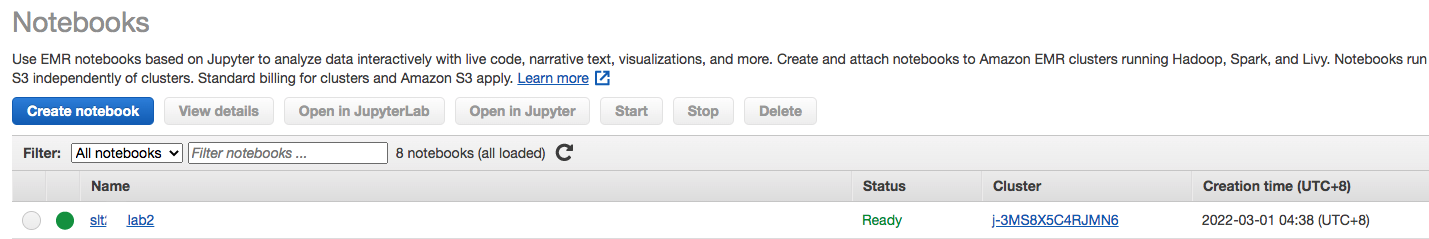

3. **Load the data using Spark**

Spark has been proven to be more capable than Pandas in handling large data using distributed computing, hence Spark was used especially in processing the metadata files.

Media folder with a total file size of 618.1 TB

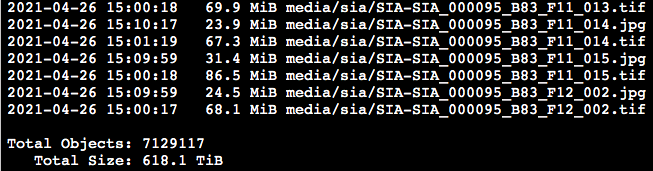

Metadata folder with a total file size of 68.3 GB

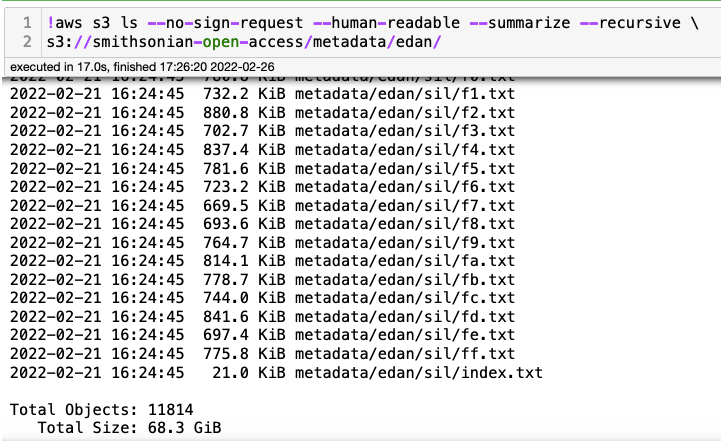

4. **Perform Exploratory Data Analysis (EDA)**

To be able to provide summary statistics, EDA was performed. The results were generated using Spark dataframe queries. Plots were also created to aid in visualization.

5. **Analyze the Results**

The results of the EDA were analyzed and summarized to extract interesting insights.

In [3]:
import json
import pandas as pd
import re
from tqdm import tqdm

from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import *

from IPython.display import Image, display
from IPython.core.display import HTML, display

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Data Source

### Description of the Dataset

To better understand and learn about the Smithsonian Institution, the proponents opted to utilize the **Smithsonian Open Access**, an initiative by the institute that allows people to download, explore, share, and reuse millions of digital items from the Smithsonian collection. It has **2.8 million files** as of February 2020 launch date. These photos and data have been placed into the public domain as _Creative Commons Zero (CC0)_, a designation used by cultural organizations to relinquish any copyright rights they may have for a digital asset, which means that anybody can use, change, and share these data without needing to seek permission from the Smithsonian. The institution has declared the digital items to be in the public domain, signifying it is free of copyright limitations and can be used for any purpose. Open access is a one off chance to introduce Smithsonian collections to new audiences, engage with the public, and provide critical context for pressing concerns of the twenty-first century.

Open Access applies to Smithsonian's digital assets, whether developed, stored, or maintained. Text, still photographs, sound recordings, research datasets, 3D models, collections data, and other types of data are some examples of what is available. *(Smithsonian Open Access, n.d.)*

Three folders are available through Amazon AWS - 3D, Media, and Metadata. The proponents focused on the last two folders for the exploration of this database. The Media directory consists of **7,129,117** objects with a total size of **618.1 TB**, while Metadata houses a total of **11,814** objects with a total size of **68.3 GB**.

## Data Exploration

### Summary of Smithsonian Media Files

The Media folder in the Smithsonian Open Access repository contains the images in `.jpg` and `.tif` format of the several exhibits that can be visited and seen in the different Smithsonian museums and galleries. Currently, there are 17 folders in this directory, representing different museums, galleries, and departments of the Smithsonian. 

Additional details are listed below:
<br>
<br>
<center><span style="font-size:12px;font-style:default;"><b>Table 1. Summary of the Smithsonian Media Folder</b><br></span></center>

| **Smithsonian Units**                                    | **Number of Files**| **Total Size of Files** |
|:---------------------------------------------------------|:------------------:|:-----------------------:|
| Anacostia Community Museum                               | 1155               | 51.7 GiB                |
| Cooper Hewitt, Smithsonian Design Museum (New York City) | 83840              | 2.1 TiB                 |
| Freer Gallery of Art and Arthur M. Sackler Gallery       | 15533              | 462.4 GiB               |
| Hirshhorn Museum and Sculpture Garden                    | 661                | 278.3 MiB               |
| National Air and Space Museum                            | 8855               | 307.6 GiB               |
| National Museum of African American History and Culture  | 37687              | 2.9 TiB                 |
| National Museum of African Art                           | 412                | 3.2 GiB                 |
| National Museum of American History                      | 17941              | 359.9 GiB               |
| National Museum of the American Indian                   | 510                | 8.8 GiB                 |
| National Museum of Natural History                       | 6837773            | 606.4 TiB               |
| National Portrait Gallery                                | 29325              | 2.2 TiB                 |
| National Postal Museum                                   | 4922               | 30.2 GiB                |
| National Zoological Park                                 | 1602               | 24.7 GiB                |
| Office of the Chief Information Officer                  | 2                  | 74.1 MiB                |
| Smithsonian American Art Museum                          | 30063              | 1.3 TiB                 |
| Smithsonian Gardens                                      | 32517              | 1014.9 GiB              |
| Smithsonian Institution Archives                         | 26317              | 1.0 TiB                 |

To get a sense of the various media collected by each Smithsonian Museum, a random sampling of images were collected and plotted from each folder (the folder name is indicated in parantheses).

**Anacostia Community Museum (ACM)**

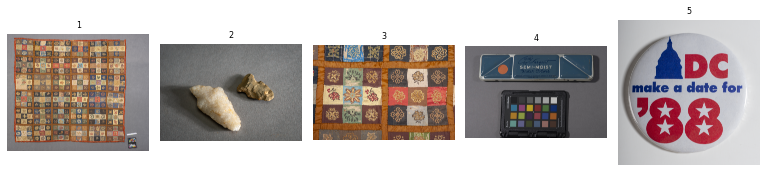

**Cooper Hewitt, Smithsonian Design Museum (CHSDM)**

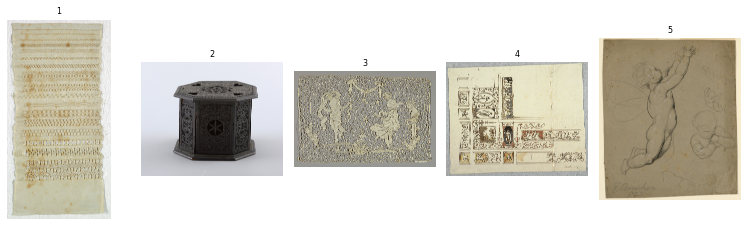

**Freer Gallery of Art and Arthur M. Sackler Gallery (FS)**

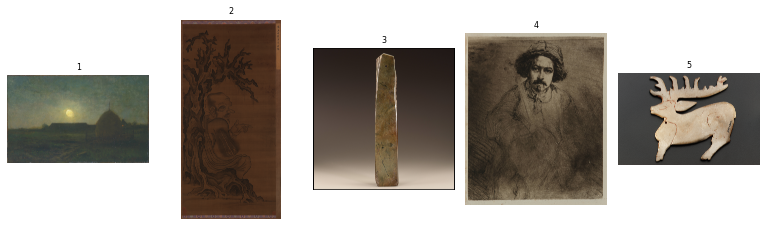

**Hirshhorn Museum and Sculpture Garden (HMSG)**

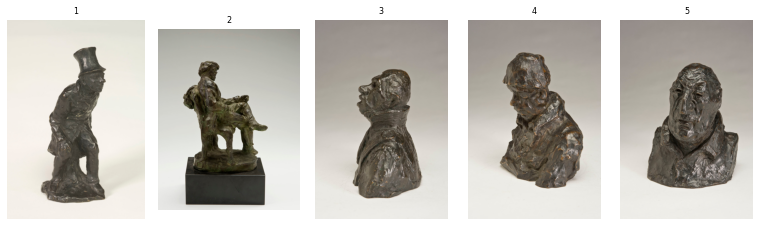

**National Air and Space Museum (NASM)**

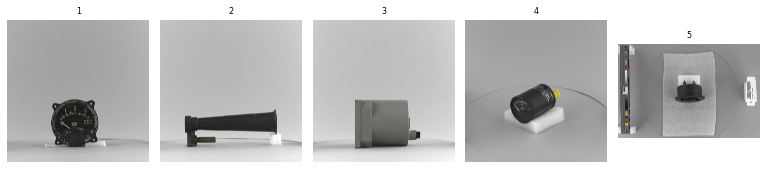

**National Museum of African American History and Culture (NMAAHC)**

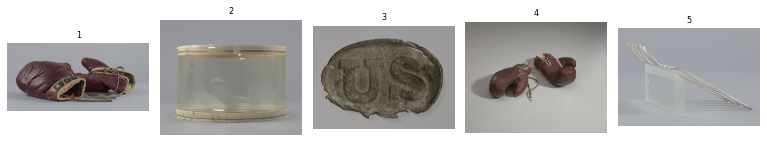

**National Museum of African Art (NMAFA)**

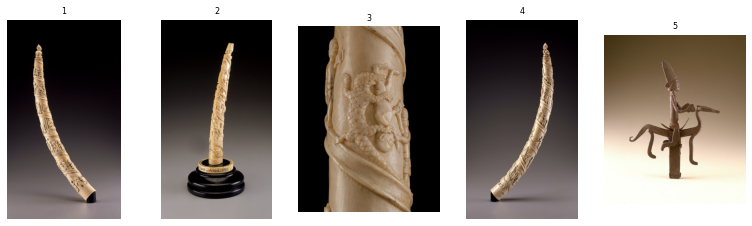

**National Museum of American History (NMAH)**

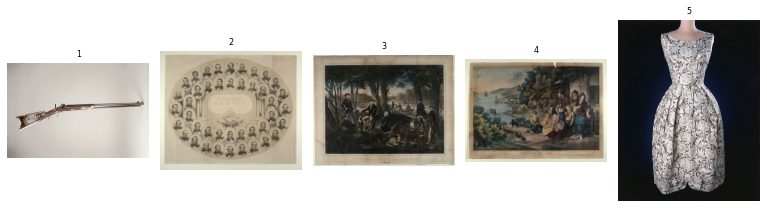

**National Museum of the American Indian (NMAI)**

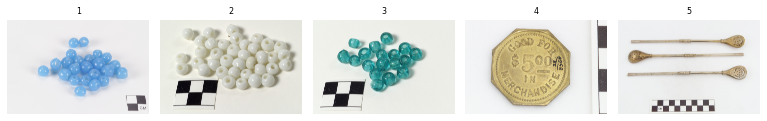

**National Museum of Natural History (NMNH)**

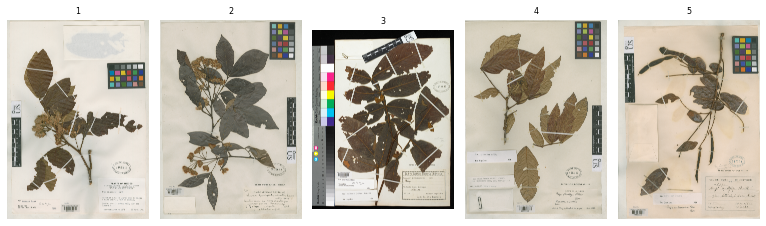

**National Portrait Gallery (NPG)**

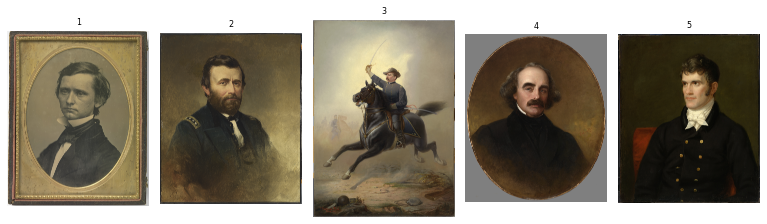

**National Postal Museum (NPM)**

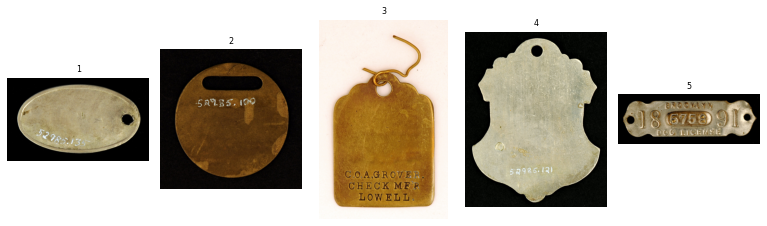

**National Zoological Park (NZP)**

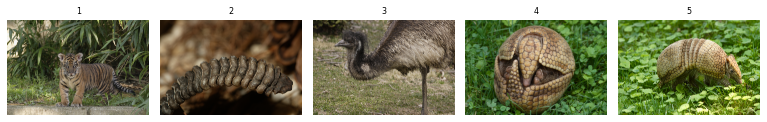

**Office of the Chief Information Officer (OCIO)**

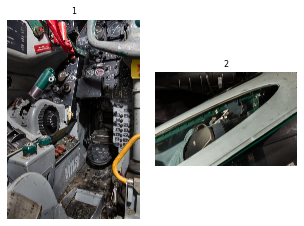

**Smithsonian American Art Museum (SAAM)**

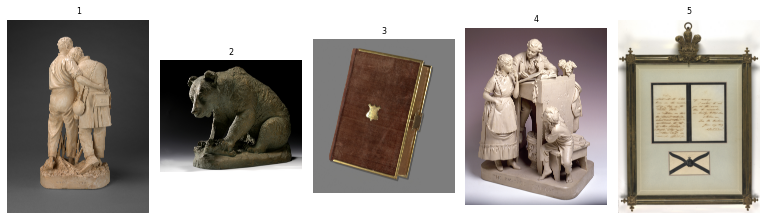

**Smithsonian Gardens (SG)**

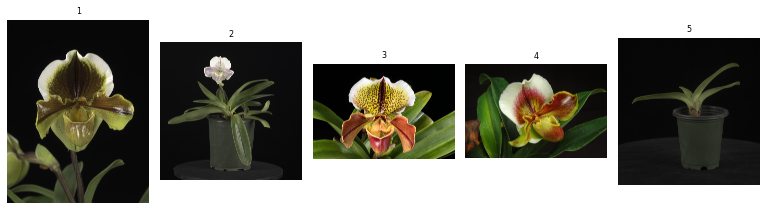

**Smithsonian Institution Archives (SIA)**

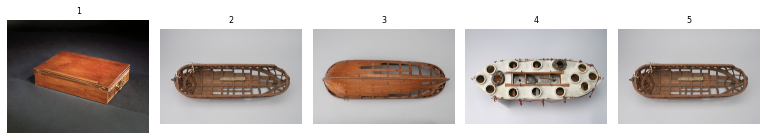

### Summary of Smithsonian Metadata

The Metadata folder contains json files with detailed descriptions of the artworks and exhibits that can be seen in the different Smithsonian museums and galleries. Some features include `title`, `place of origin`, `contributors`, and `donors`.

There are 46 folders in this directory and details are listed below:
<br>
<br>
<center><span style="font-size:12px;font-style:default;"><b>Table 2. Summary of the Smithsonian Metadata Folder</b><br></span></center>

| **Smithsonian Units**                                    | **Number of Files** | **Total Size of Files** |
|:------------------------------------------------------------|:---------------:|:-------------------:|
| Archives of American Art                                    | 257             | 1.2 GiB             |
| Archives of American Gardens                                | 256             | 246.6 MiB           |
| National Museum of American History                         | 257             | 2.2 GiB             |
| Anacostia Community Museum                                  | 257             | 2.1 MiB             |
| Anacostia Community Museum Archives                         | 256             | 41.1 MiB            |
| Ralph Rinzler Folklife Archives and Collections             | 257             | 357.8 MiB           |
| Cooper Hewitt, Smithsonian Design Museum                    | 257             | 294.6 MiB           |
| Eliot Elisofon Photographic Archives                        | 257             | 472.5 MiB           |
| Smithsonian Field Book Project                              | 257             | 4.9 MiB             |
| National Museum of Asian Art                                | 257             | 20.8 KiB            |
| National Museum of Asian Art Archive                        | 257             | 126.3 MiB           |
| Freer Gallery of Art and Arthur M. Sackler Gallery          | 257             | 41.5 MiB            |
| Smithsonian Gardens                                         | 257             | 6.2 MiB             |
| Hirshhorn Museum and Sculpture Garden                       | 257             | 2.5 MiB             |
| Human Studies Film Archives                                 | 257             | 5.9 MiB             |
| National Anthropological Archives                           | 257             | 313.8 MiB           |
| National Air and Space Museum                               | 257             | 16.5 MiB            |
| National Air and Space Museum Archives                      | 256             | 530.2 MiB           |
| National Museum of African American History and Culture     | 257             | 86.2 MiB            |
| National Museum of African Art                              | 257             | 1.5 MiB             |
| National Museum of American History                         | 257             | 4.6 GiB             |
| National Museum of the American Indian                      | 257             | 887.1 MiB           |
| National Museum of the American Indian Archives             | 256             | 131.4 MiB           |
| NMNH - Anthropology Dept.                                   | 257             | 1.9 GiB             |
| NMNH - Vertebrate Zoology - Birds Division                  | 257             | 2.6 GiB             |
| NMNH - Botany Dept.                                         | 257             | 25.1 GiB            |
| NMNH - Education & Outreach                                 | 257             | 46.1 MiB            |
| NMNH - Entomology Dept.                                     | 257             | 2.7 GiB             |
| NMNH - Vertebrate Zoology - Fishes Division                 | 257             | 2.3 GiB             |
| NMNH - Vertebrate Zoology - Herpetology Division            | 257             | 2.7 GiB             |
| NMNH - Invertebrate Zoology Dept.                           | 257             | 8.6 GiB             |
| NMNH - Vertebrate Zoology - Mammals Division                | 257             | 3.4 GiB             |
| NMNH - Mineral Sciences Dept.                               | 257             | 1.7 GiB             |
| NMNH - Paleobiology Dept.                                   | 257             | 3.1 GiB             |
| National Portrait Gallery                                   | 257             | 117.4 MiB           |
| National Portrait Gallery Archive                           | 256             | 7.2 KiB             |
| National Postal Museum                                      | 257             | 21.2 MiB            |
| Smithsonian's National Zoo & Conservation Biology Institute | 257             | 2.1 MiB             |
| OCIO's Digitization Program Office                          | 256             | 187.9 KiB           |
| OFEO-SG: Community of Gardens                               | 256             | 34.0 MiB            |
| Smithsonian American Art Museum                             | 257             | 89.6 MiB            |
| Smithsonian American Art Museum Archive                     | 256             | 1.3 MiB             |
| South Carolina State Museum                                 | 256             | 391.5 KiB           |
| Smithsonian Institution                                     | 257             | 25.5 KiB            |
| Smithsonian Institution Archives                            | 257             | 2.0 GiB             |
| Smithsonian Libraries                                       | 257             | 192.2 MiB           |

In [4]:
# Set spark to be case sensitive to cater to different column formats
spark.conf.set("spark.sql.caseSensitive", "true")

# Load all files from metadata folder
df_all = spark.read.json('s3://smithsonian-open-access/metadata/edan/*/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Per Museum Summary Count

A summary of the number of records per Smithsonian unit is created to see the distribution of the database.

<span style="font-size:12px;font-style:default;"><b>Table 3. Summary Count of Records per Unit</b><br></span>

In [5]:
# Summarize metadata by unitcode
df_all_summary = (df_all
                  .select('unitCode')
                  .groupby('unitCode')
                  .count()
                  .orderBy(F.desc('count'))
                  .toPandas())

df_all_summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         unitCode    count
0      NMNHBOTANY  8677273
1         NMNHINV  3921896
2            NMAH  2638554
3       NMNHPALEO  1435829
4     NMNHMAMMALS  1234169
5        NMNHENTO  1215244
6       NMNHHERPS  1163700
7       NMNHBIRDS  1132741
8      NMNHANTHRO   963939
9      NMNHFISHES   953613
10     NMNHMINSCI   890677
11            SIA   884156
12           ACAH   578258
13            AAA   364077
14           NMAI   303436
15         NASMAC   183897
16           EEPA   110481
17            NAA    95004
18   CFCHFOLKLIFE    91604
19          CHNDM    87442
20            SIL    79844
21            AAG    53996
22            FSA    32905
23           SAAM    30564
24          NMAIA    27787
25            NPG    27030
26         NMAAHC    19735
27           ACMA    11642
28  NMNHEDUCATION    11631
29        OFEO-SG    10095
30            FSG     9138
31            NPM     7128
32           NASM     1978
33           HSFA     1761
34            FBR     1517
35            NZP     1067
3

As seen in the table above and the plot below, the National Museum of Natural History - Botany Department has the most number of records, more than twice of the second highest unit with 8,677,273 record count. In contrast, the Smithsonian Institution (SI) had the lowest count with just 1 record. Bulk of the collection comes from the National Museum of Natural History (NMNH) with 10 out of 11 of its departments included in the top 11.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

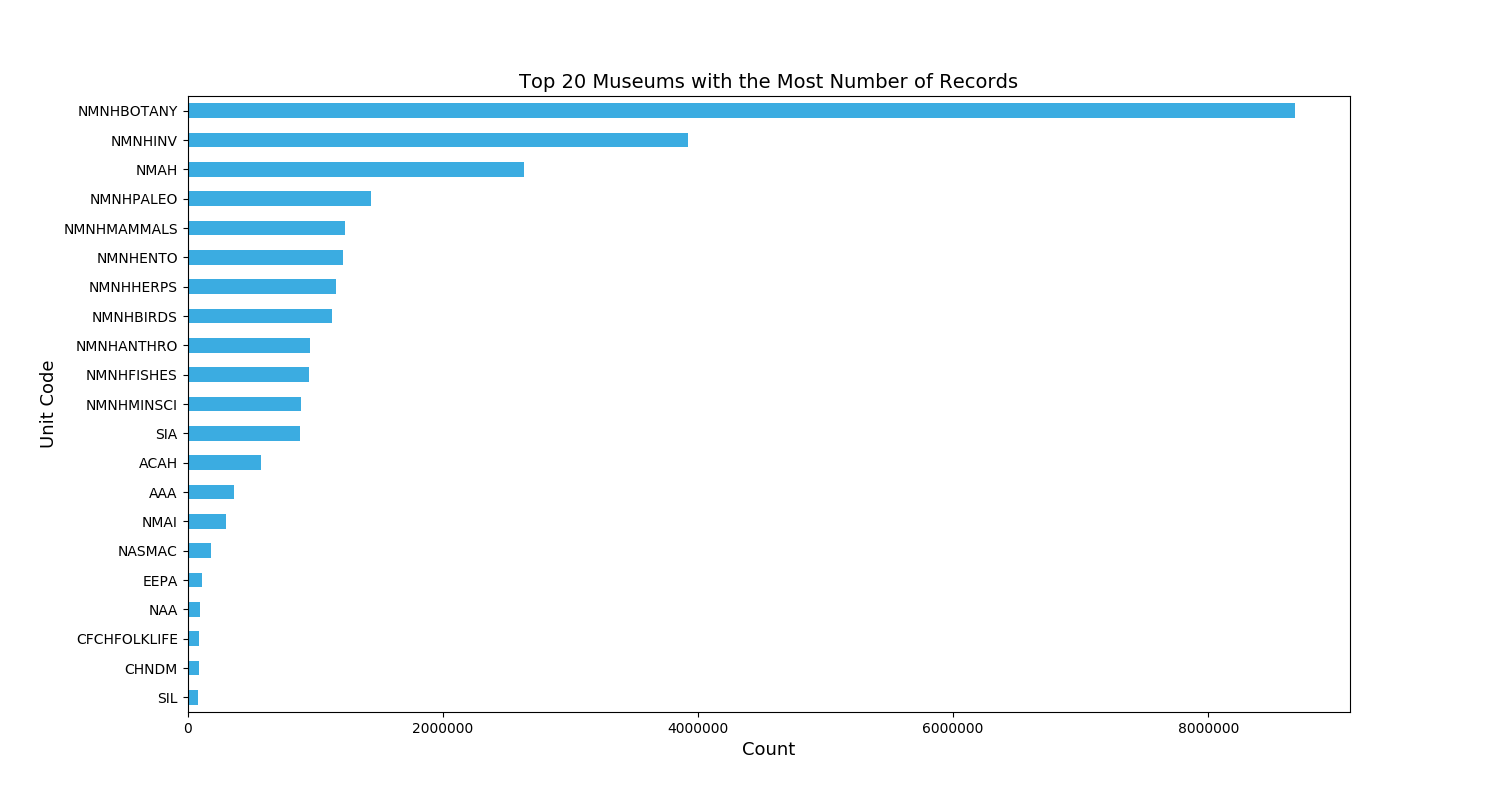

In [6]:
# Plot the record count per unit
fig, ax = plt.subplots(figsize=(15, 8))
df_all_summary[:21].set_index('unitCode')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Unit Code', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Top 20 Museums with the Most Number of Records', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 2. </b>Plot of the Top 20 Museums with the Most Number of Records</span>

#### Top 20 Source Countries

The top 20 source countries were extracted to see where most of the exhibits originate.

<span style="font-size:12px;font-style:default;"><b>Table 4. Summary Table of the Top 20 Source Countries</b><br></span>

In [7]:
# Extract the top source countries
df_all_country = (df_all
                  .select('content.indexedStructured.geoLocation.L2')
                  .withColumn("countries", concat_ws(",", F.col('L2')))
                  .withColumn('country', 
                              when(F.col('countries').startswith('{'), 
                                   regexp_extract(F.col('countries'), 
                                                  '(?<="content":")([^"?()]*)', 1))
                              .otherwise('None'))
                  .filter(F.col('country') != 'None')
                  .groupby('country')
                  .count()
                  .orderBy(F.desc('count'))
                  .limit(20)
                  .toPandas())

df_all_country

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

             country    count
0      United States  8359613
1             Mexico   978427
2             Brazil   762469
3        Philippines   550172
4             Canada   513392
5           Colombia   466633
6             Panama   431522
7          Venezuela   343214
8              China   337620
9               Peru   333549
10           Ecuador   280891
11             Japan   229483
12        Costa Rica   220288
13         Indonesia   217456
14         Australia   215629
15            Guyana   196398
16               USA   193019
17              Cuba   192966
18        Antarctica   174389
19  French Polynesia   159632

From the table above and the plot below, it is evident that there is a huge imbalance to the data, with bulk of the records coming from the **United States**. Since the Smithsonian is based in the US, it's intuitive that most of its collection come from there. The Smithsonian receives the majority of its collection objects from individuals and private collectors, as well as transfers from federal agencies such as the National Aeronautics and Space Administration, the U.S. Postal Service and others.

The Philippines came in 4th with a total of 550,172 contributions to the institution.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

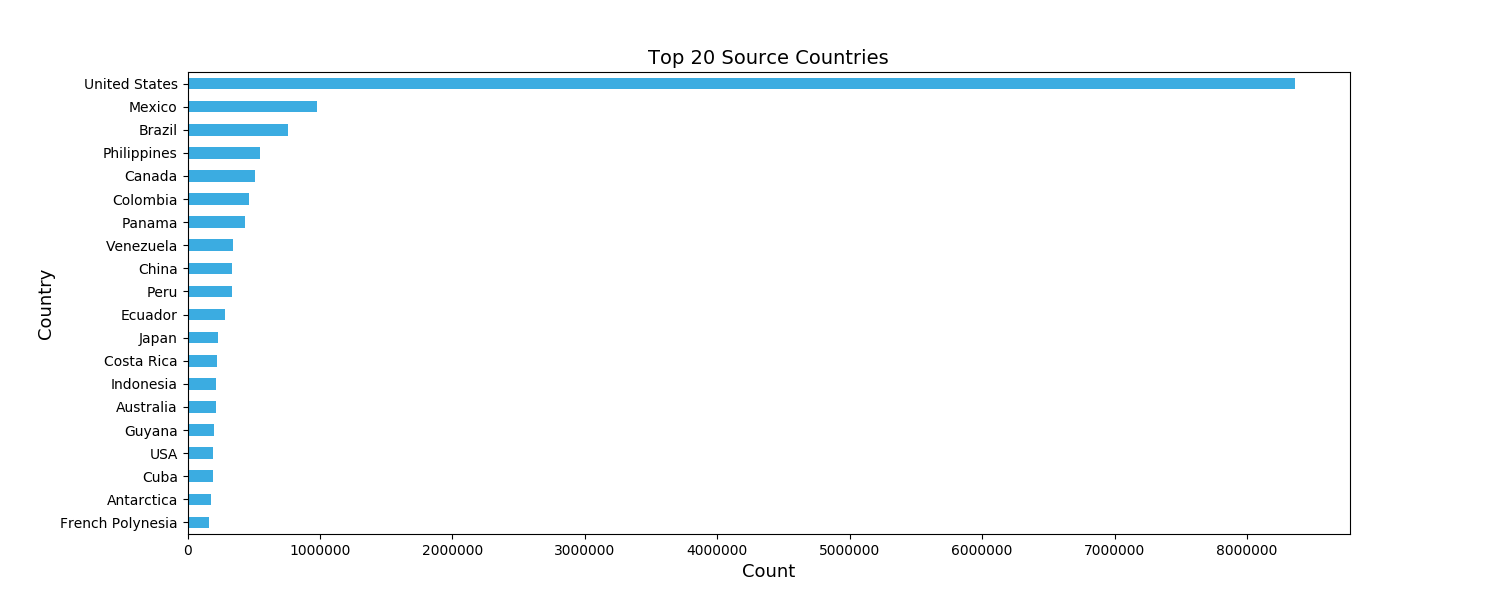

In [8]:
# Plot the source countries
fig, ax = plt.subplots(figsize=(15, 6))
df_all_country.set_index('country')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Country', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Top 20 Source Countries', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 3. </b>Plot of the Top 20 Source Countries</span>

#### Top 10 Origin Culture

The top 10 cultures were extracted to further appreciate where the exhibits originate.

<span style="font-size:12px;font-style:default;"><b>Table 5. Summary Table of the Top 10 Origin Cultures</b><br></span>

In [9]:
# Extract top origin cultures
df_all_culture = (df_all
                  .select('content.freetext.culture.content')
                  .withColumn('culture', F.col('content').getItem(0))
                  .filter(F.col('culture') != 'None')
                  .groupby('culture')
                  .count()
                  .orderBy(F.desc('count'))
                  .limit(10)
                  .toPandas())

df_all_culture

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   culture   count
0              Prehistoric  144922
1                Americans   29716
2                   Eskimo   28848
3                 Historic   22966
4          Middle Missouri   14606
5  Yoruba (African people)   14286
6           Zuni (A:shiwi)   11032
7                Not Given   10884
8                 Japanese    8491
9                     Hopi    8451

The cultures from which these exhibits originate is summarized in the table above and the plots below. As observed, approximately half of the pieces in the collection are prehistoric in origin. For the historic culture, the most well-represented culture is "Americans", with "Eskimo" coming in close second.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

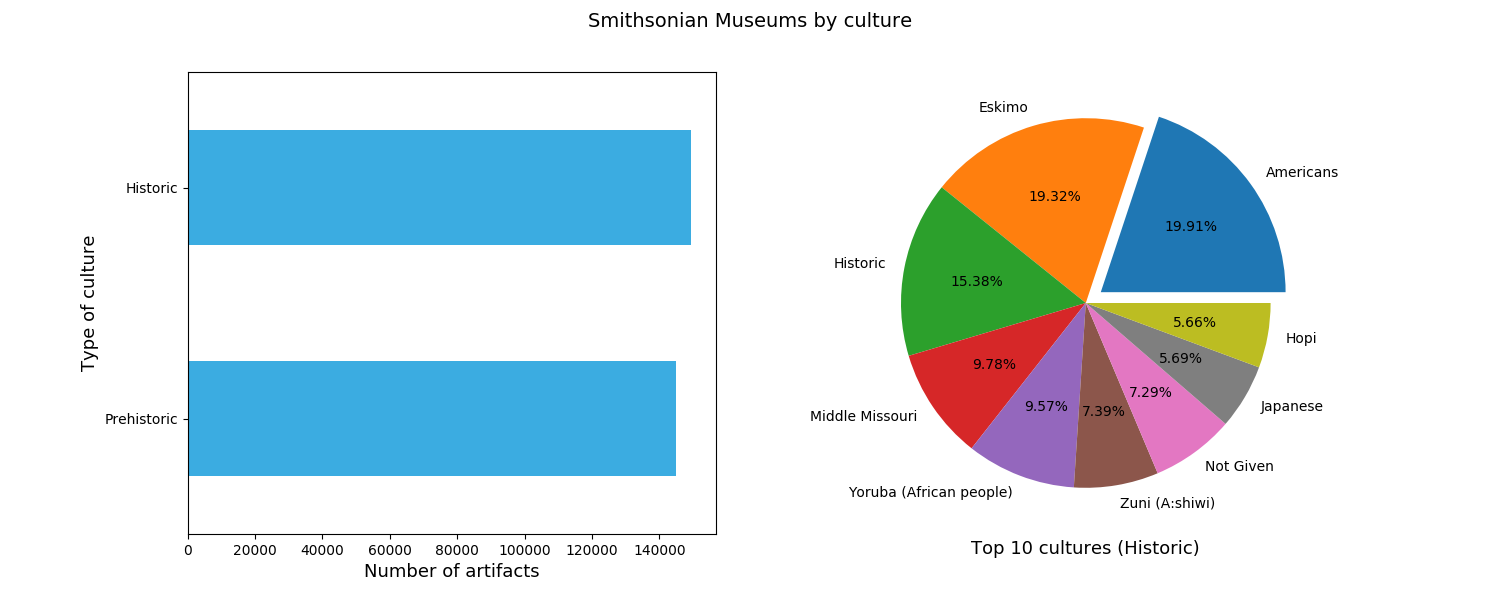

In [10]:
# Get only historic cultures
df_all_historic = df_all_culture.iloc[1:]

# Summarize prehistoric and historic
prehist_all = df_all_culture.set_index('culture')['count']['Prehistoric']
hist_all = df_all_historic.set_index('culture').sum().squeeze()

df_all_hist = pd.DataFrame([prehist_all, hist_all])
df_all_hist.index = ['Prehistoric', 'Historic']
df_all_hist.columns = ['count']

# Plot the top origin cultures
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
df_all_hist['count'].plot(kind='barh', ax=ax[0], color='#3bace1')
df_all_historic.set_index('culture')['count'].plot(kind='pie', ax=ax[1], autopct='%1.2f%%', explode=explode)
ax[0].set_xlabel('Number of artifacts', fontsize=13)
ax[0].set_ylabel('Type of culture', fontsize=13)
ax[1].set_xlabel('Top 10 cultures (Historic)', fontsize=13)
ax[1].set_ylabel('')
plt.suptitle('Smithsonian Museums by culture', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 4. </b>Plots of the Top Origin Cultures</span>

#### Top 20 Donors

Since the Smithsonian collection are mostly from donations, the top 20 donors are extracted.

<span style="font-size:12px;font-style:default;"><b>Table 6. Summary Table of the Top 20 Donors</b><br></span>

In [11]:
# Extract top donors
df_all_donor = (df_all
                .select('content.freetext.name.label', 
                        'content.freetext.name.content')
                .withColumn('new', F.arrays_zip("label", "content"))
                .withColumn('new', F.explode(F.col('new')))
                .select('new')
                .filter(F.col('new.label') == 'Donor Name')
                .select('new.content')
                .withColumnRenamed('content', 'donor')
                .groupby('donor')
                .count()
                .orderBy(F.desc('count'))
                .limit(20)
                .toPandas())

df_all_donor

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                           donor   count
0             River Basin Survey  223454
1   Bureau Of American Ethnology  100504
2                 No Information   22814
3             Dr. Waldo R. Wedel   18256
4               Edward W. Nelson   15402
5       Dr. Henry B. Collins Jr.   14974
6         Dr. Clifford Evans Jr.   12630
7          Dr. William L. Abbott   12472
8                  James A. Ford   12184
9                  George Phebus   11490
10                   Joseph Long   11136
11   National Geographic Society   10780
12       Smithsonian Institution   10254
13          Dr. Ales F. Hrdlicka    9939
14                  R. K. Harris    9930
15               Victor J. Evans    9454
16          Walter W. Taylor Jr.    7824
17          Col. James Stevenson    7458
18           Columbia University    7446
19            Herbert W. Krieger    6846

River Basin Survey takes the top donor spot with a total of 223,454 donations. As part of its Bureau of American Ethnology, the Smithsonian Institution established the River Basin Surveys unit, which undertook archaeological research as part of the IASP. The IASP was the largest and most successful salvage program in the United States' history. From 1946 through 1969, the Smithsonian's RBS operated in a variety of locations across the country, but mostly in the Upper Missouri River Basin. *(Rogers Archaeology Lab, 2014)*

Dr. Waldo R. Wedel is the first individual in the list and he was an American archaeologist and a pioneer in the study of the Great Plains' prehistory. *(Wikipedia contributors, 2022)*

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

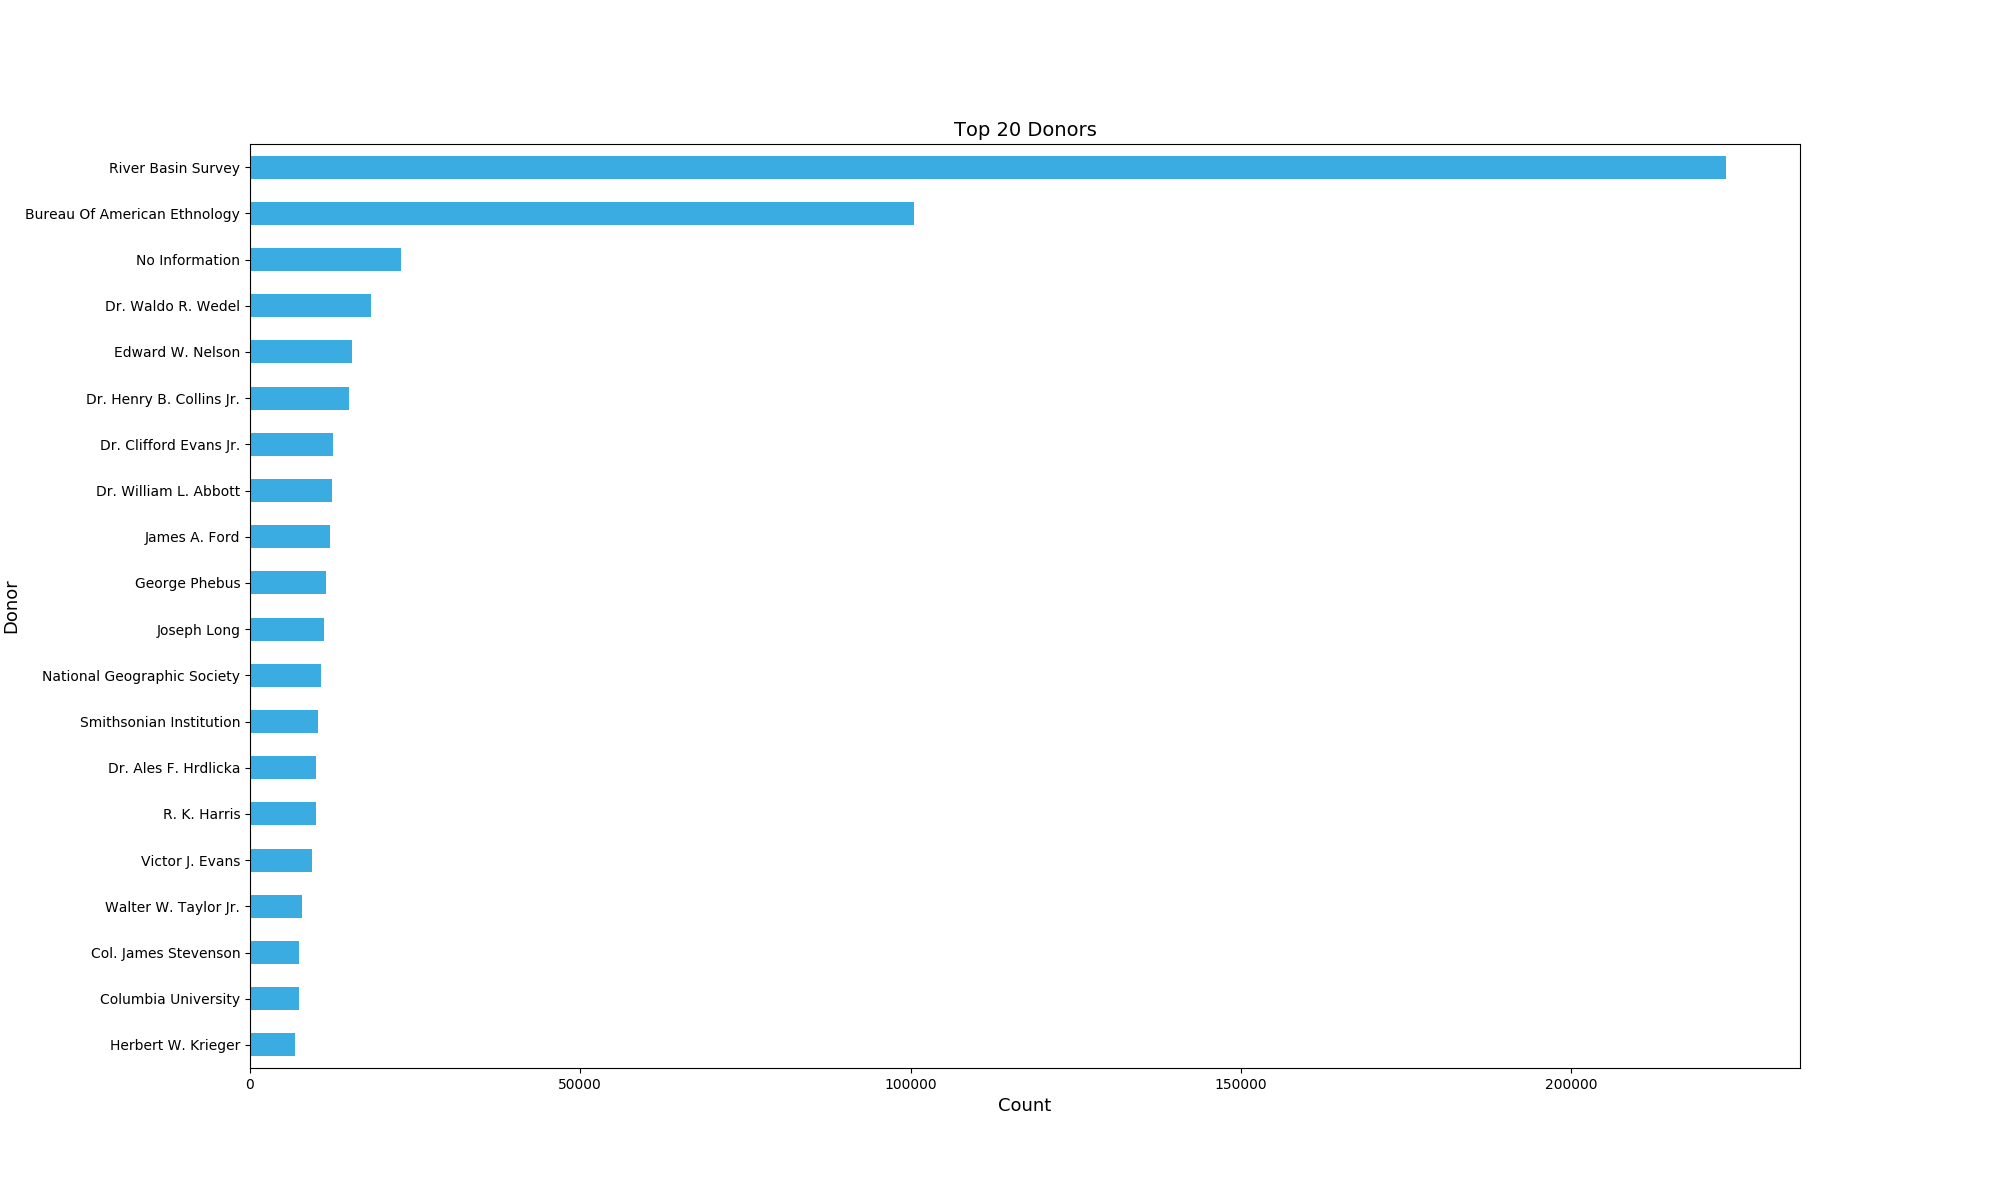

In [12]:
# Plot top donors
fig, ax = plt.subplots(figsize=(20, 12))
df_all_donor.set_index('donor')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Donor', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Top 20 Donors', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 5. </b>Plot of the Top 20 Donors</span>

### National Museum of Natural History (NMNH) Summary

As can be seen from the above summary, the bulk of the data appears to belong to the National Museum of Natural History (NMNH), with not just one but eleven metadata folders in the repository dedicated to this institution and its varied departments. Hence the analysts decided to focus on the NMNH as the primary museum of interest, considering it has the largest and most diverse collection, not to mention being one of the most famous among the Smithsonian museums.

The National Museum of Natural History is the most visited natural history museum in the world and the eleventh most visited museum in the world, with 7.1 million visitors annually who avail of its free admission 364 days a year. Having opened in 1910, the building itself is an impressive structure of 140,000 square meters, including 30,200 square meters of exhibition and public space. The institution also has over 1,000 employees, including 185 professional natural history scientists—the largest concentration of such scientists in the world. Its collection includes over 145 million botanical, zoological, mineral, and anthropological specimens. *(Wikipedia contributors, 2022)*

The NMNH is home to various research and collection departments. *(National Museum of Natural History)* These departments and their corresponding unit codes are:

* Department of Botany - NMNHBOTANY
* Department of Anthropology - NMNHANTHRO
* Department of Paleobiology - NMNHPALEO
* Department of Mineral Sciences - NMNHMINSCI
* Department of Entomology  - NMNHENTO
* Department of Invertebrate Zoology - NMNHINV
* Department of Vertebrate Zoology

The Department of Vertebrate Zoology in turn has sub-divisions with their respective research focus:
* Division of Mammals - NMNHMAMMALS
* Division of Fishes - NMNHFISHES
* Division of Birds - NMNHBIRDS
* Division of Reptiles and Amphibians (Herpetology) - NMNHHERPS

Finally, there is a non-research deparment focusing on education and outreach:
* Department of Education - NMNHEDUCATION

Each of these departments or divisions has a dedicated metadata folder in the Smithsonian Open Access Data Repository. The breakdown in the amount of data by number of records is shown below.

In [13]:
# Load all files of NMNH
df_nmnh = spark.read.json('s3://smithsonian-open-access/metadata/edan/nmnh*/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="font-size:12px;font-style:default;"><b>Table 7. Summary Count of Records per Unit of the NMNH</b><br></span>

In [14]:
# Summarize NMNH per unitcode
df_nmnh_summary = (df_nmnh.
                   select('unitCode').
                   groupby('unitCode').
                   count().
                   orderBy(F.desc('count')).
                   toPandas())

df_nmnh_summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         unitCode    count
0      NMNHBOTANY  8677273
1         NMNHINV  3921896
2       NMNHPALEO  1435829
3     NMNHMAMMALS  1234169
4        NMNHENTO  1215244
5       NMNHHERPS  1163700
6       NMNHBIRDS  1132741
7      NMNHANTHRO   963939
8      NMNHFISHES   953613
9      NMNHMINSCI   890677
10  NMNHEDUCATION    11631

As seen in the above table and the below bar plot, the Botany Department has a significantly higher number of records related to their collection compared to the other departments, more than twice that of the Invertebrate Zoology Department. Meanwhile, as a non-research office, the Education department only has a few thousand items in their collection.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

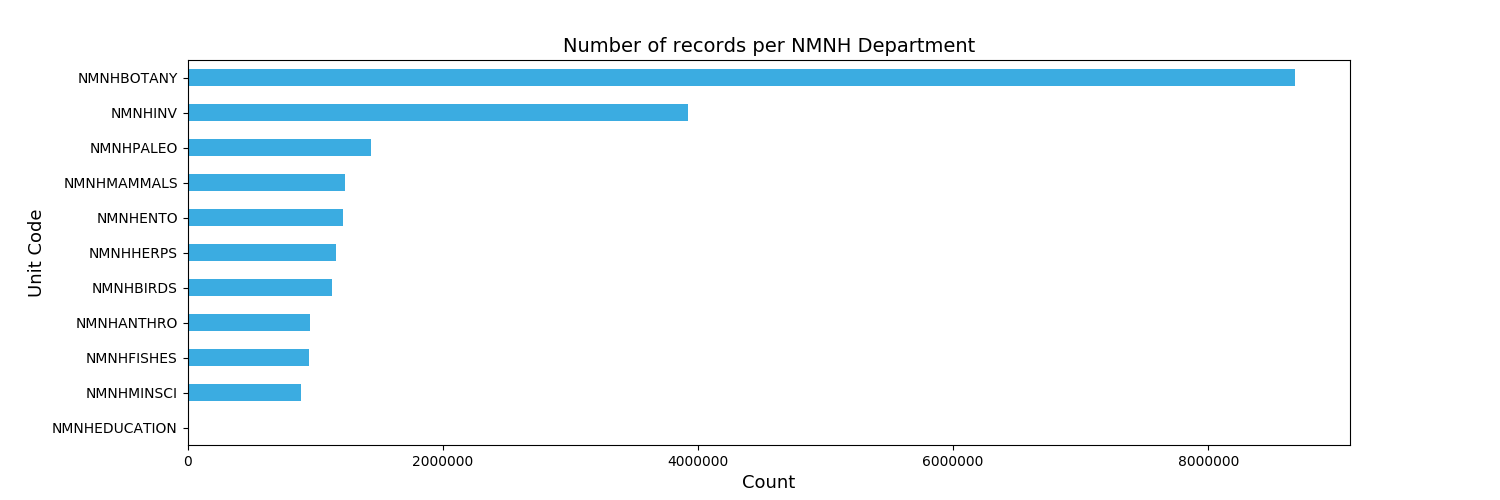

In [15]:
# Bar graph of the record count per unit
fig, ax = plt.subplots(figsize=(15, 5))
df_nmnh_summary.set_index('unitCode')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Unit Code', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Number of records per NMNH Department', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 6. </b>Plot of the Number of Records per NMNH Department</span>

This is the same breakdown, with percentages shown in the form of a pie graph. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

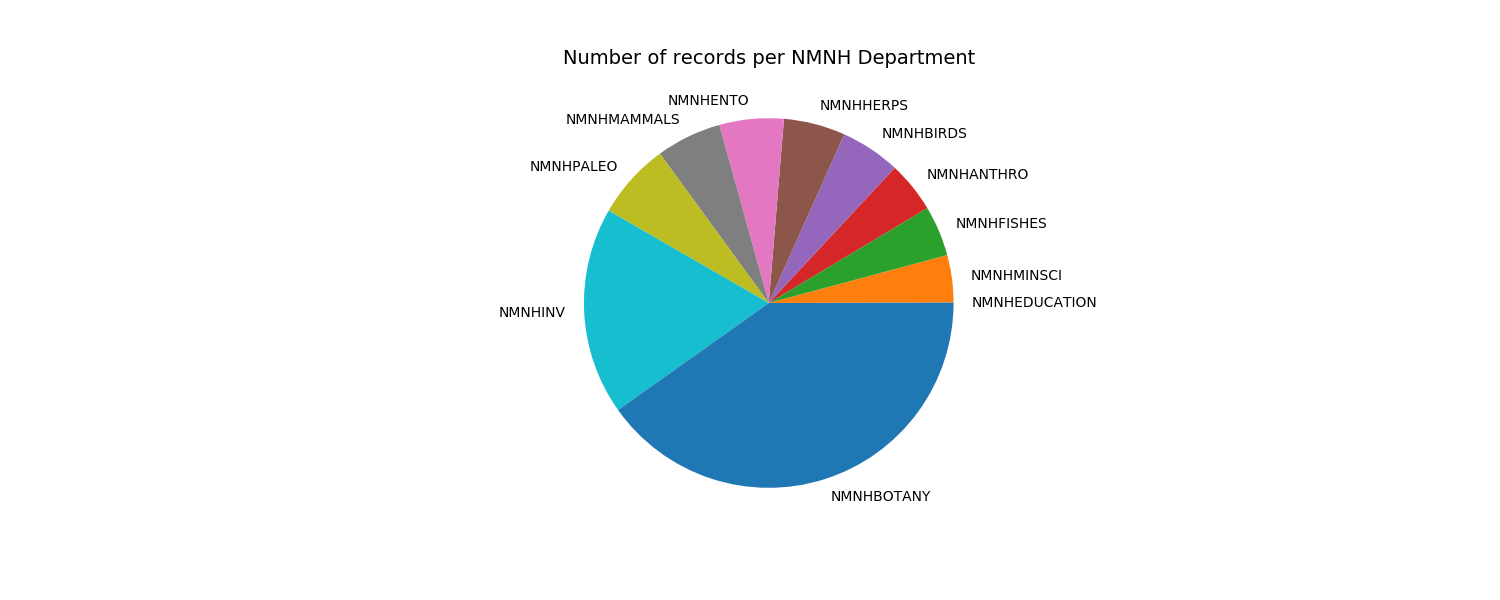

In [16]:
# Pie chart of the record distribution per unit
fig, ax = plt.subplots(figsize=(15, 6))
df_nmnh_summary.set_index('unitCode')['count'].sort_values().plot(kind='pie')
plt.ylabel('')
plt.title('Number of records per NMNH Department', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 7. </b>Pie Graph of the Number of Records per NMNH Department</span>

Separate plots and statistics can be compiled for each of the individual departments. This will be the focus of subsequent sections.

### NMNH Department of Botany

One good place to start is the Botany Department with its vast collection, and one item of curiosity might be where the numerous samples are coming from. Hence top 20 source countries for this department are tabulated and plotted below.

In [17]:
# Load all NMNH Botany files
df_botany = spark.read.json('s3://smithsonian-open-access/metadata/edan/nmnhbotany/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="font-size:12px;font-style:default;"><b>Table 8. Summary Table of the Top 20 Source Countries of NMNH Department of Botany exhibits</b><br></span>

In [18]:
# Extract top source countries
df_country = (df_botany.
 select('content.indexedStructured.geoLocation.L2.content').
 withColumn('country', F.col('content').getItem(0)).
 filter(F.col('country') != 'None').
 groupby('country').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_country

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          country    count
0   United States  2523881
1          Brazil   586453
2          Mexico   556196
3        Colombia   319462
4            Peru   233016
5       Venezuela   225987
6           China   218691
7          Canada   199701
8         Ecuador   174125
9     Philippines   162956
10         Guyana   161599
11     Costa Rica   141600
12         Panama   131800
13        Bolivia   113466
14      Argentina   102241
15      Guatemala   100739
16      Australia    99783
17    Puerto Rico    97993
18           Cuba    92349
19          Japan    83264

It is evident that most of the samples are sourced from the United States, which is understandable considering the Smithsonian is an American institution. This is followed by countries in Latin America, like Brazil, Mexico, and Colombia, likely due to their proximity to the US. This underscores how specimen collection may not necessarily be evenly distributed throughout the world, since even a large country like China only ranks seventh, and tropical nations where most of the world's flora are located are underrepresented in the NMNH's collections. It is interesting to note that the Philippines made it to the top 20 list as the only representative nation from tropical Southeast Asia.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

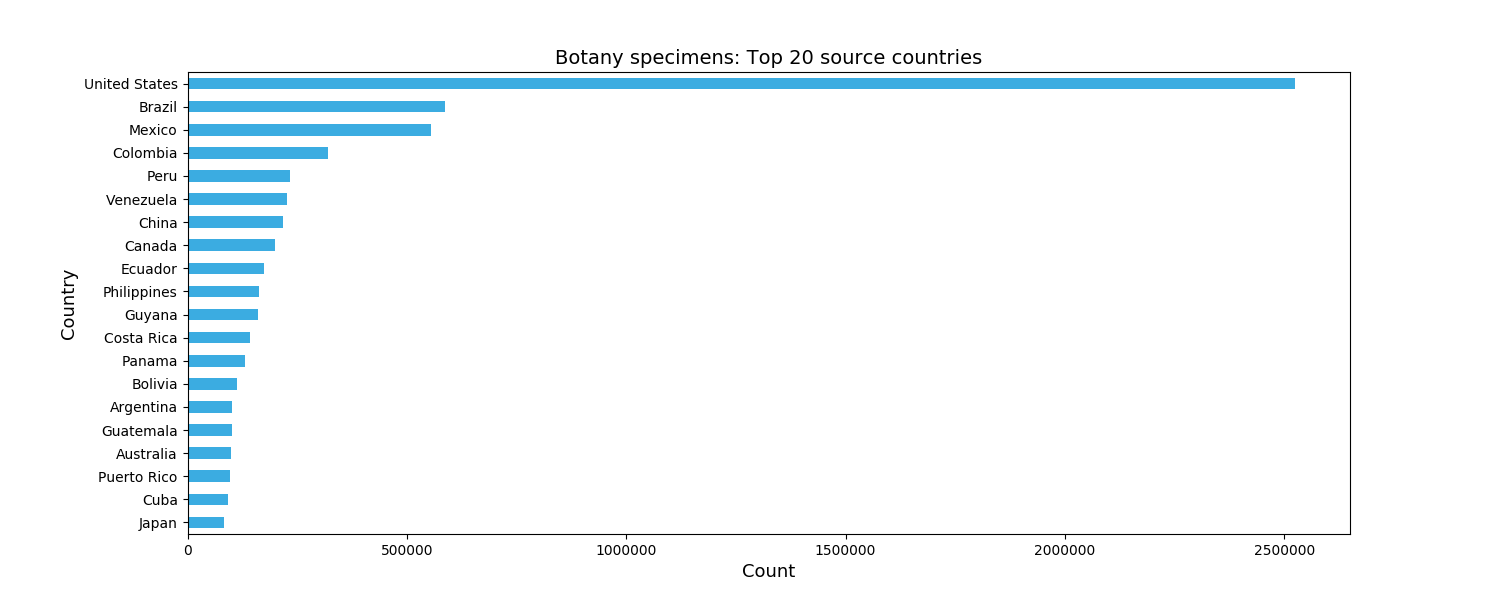

In [19]:
# Plot the top source countries for botany dept
fig, ax = plt.subplots(figsize=(15, 6))
df_country.set_index('country')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Country', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Botany specimens: Top 20 source countries', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 8. </b>Plot of the Top 20 Source Countries for Botany Specimens</span>

One might also be curious as to the most common types of plants in the Smithsonian's collection. Indeed, it is possible to extract the genus of the botanical speciments, and tabulate the frequency by which each is found. The top 20 are again shown below.

<span style="font-size:12px;font-style:default;"><b>Table 9. Summary Table of the Top 20 Genera of Botanical Speciments</b><br></span>

In [20]:
# Extract top genus of botanical speciments
df_genus = (df_botany.
 select('content.indexedStructured.scientific_name').
 withColumn("genus",
            F.split(F.col("scientific_name").getItem(0), " ").getItem(0)).
 filter(F.col('genus') != 'None').
 groupby('genus').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_genus

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            genus   count
0           Carex  115065
1          Indet.   71144
2             Poa   59674
3         Cyperus   54003
4        Paspalum   52246
5         Solanum   49167
6         Miconia   49080
7      Eragrostis   47794
8       Asplenium   40526
9      Psychotria   39654
10          Salix   37267
11  Dichanthelium   37252
12        Panicum   35980
13          Piper   34592
14       Cladonia   32900
15   Muhlenbergia   32179
16         Juncus   29851
17        Quercus   29242
18        Festuca   27711
19      Euphorbia   26003

Interestingly, we learn that the most common type of plant in the collection is Carex, a genus consisting of more than 1,500 grass-like species of deciduous, evergreen, rhizomatous, or tufted perennials. *(Gardenia.net, n.d.)* Other common genus of plants include Poa, Cyperus, and Paspalum, all of which consist of grasses and sedges.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

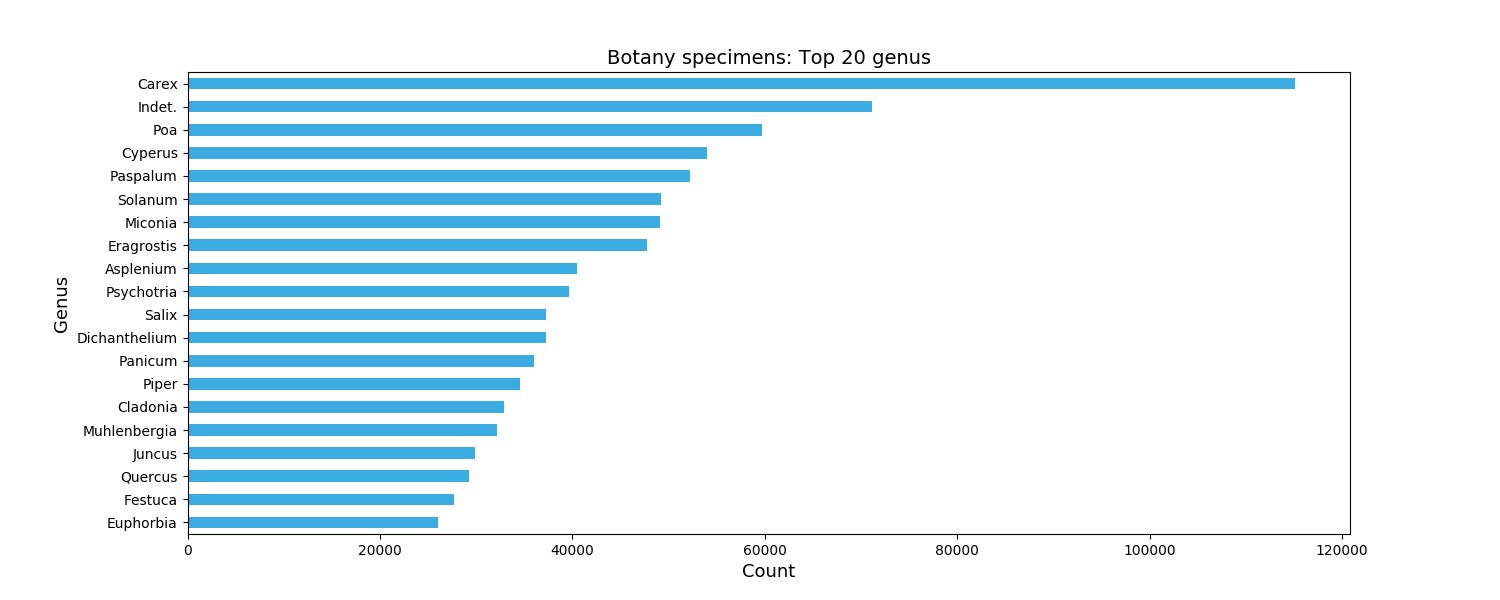

In [21]:
# Plot top 20 genus
fig, ax = plt.subplots(figsize=(15, 6))
df_genus.set_index('genus')['count'].sort_values().plot(kind='barh', color='#3bace1')
plt.ylabel('Genus', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Botany specimens: Top 20 genus', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 9. </b>Plot of the Top 20 Genera for Botany Specimens</span>

### NMNH Department of Anthropology

Another research unit is the Department of Anthropology, focused on the systematic understanding of humanity and what makes us human. This is done by exploring humanity's socio-cultural, archaeological, and evolutionary origins. *(American Anthropological Association, n.d.)* To this end, it is of interest to know the types of objects stored in the department's collection.

In [22]:
# Load all NMNH Anthropology files
df_anthro = spark.read.json('s3://smithsonian-open-access/metadata/edan/nmnhanthro/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="font-size:12px;font-style:default;"><b>Table 10. Summary Table of the Top 20 Object Types of the NMNH Department of Anthropology </b><br></span>

In [23]:
# Summarize top object types
df_artifact = (df_anthro.
 select('content.freetext.objectType.content').
 withColumn('object_type', F.col('content').getItem(0)).
 groupby('object_type').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_artifact

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         object_type   count
0              Sherd  109234
1              Point   53097
2            Scraper   34372
3       Archaeofauna   28320
4              Flake   24227
5              Knife   20910
6                Pot   19112
7             Basket   18228
8               Bowl   17051
9              Blade   14664
10             Stone   13070
11            Figure   12791
12              Bead   12410
13               Axe   10598
14              Pipe   10168
15  Archaeobotanical    9938
16           Harpoon    9556
17              Celt    9222
18               Awl    9040
19            Vessel    8944

As it turns out, some common collection artifact include *sherds* (a broken piece of ceramic material), *points* (object hafted to weapon that capable of being thrown), *scrapers* (tools thought to have been used for hideworking and woodworking), and *archaeofauna* (animal remains found at an archaeological site). Even to a non-expert these may be considered fascinating, corresponding to what laypersons might imagine archaeologists seek to uncover and analyze.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

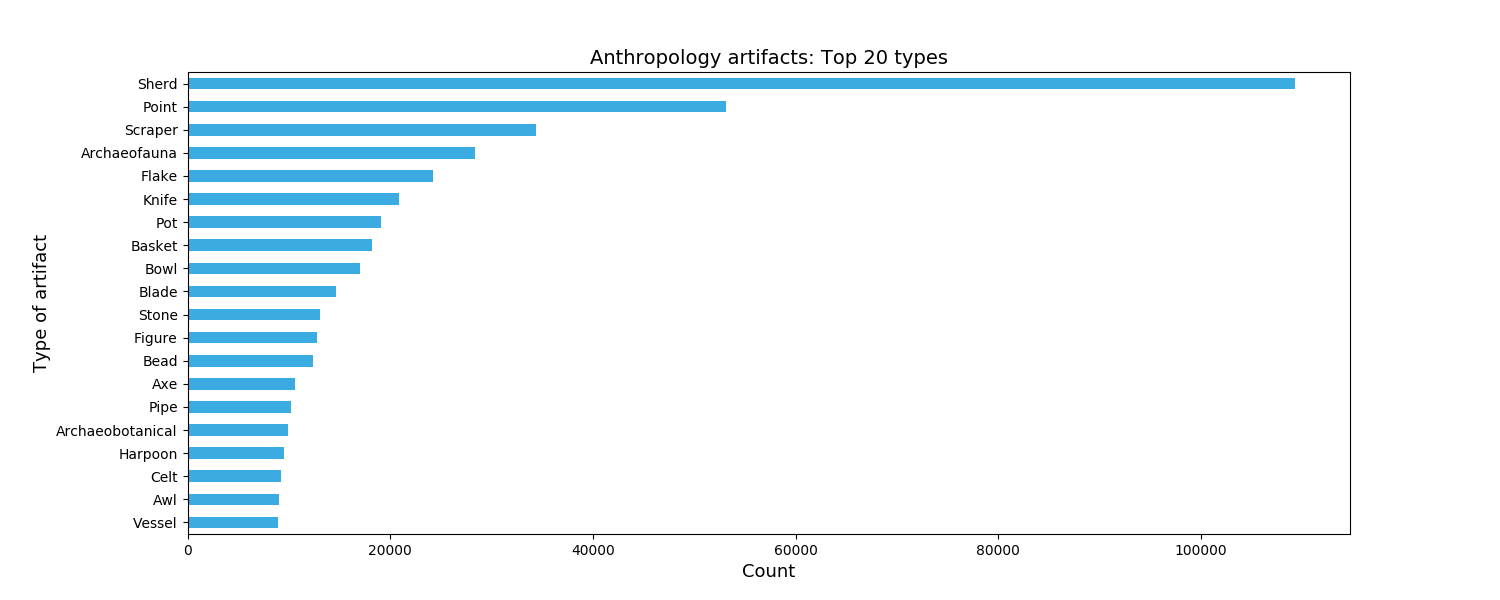

In [24]:
# Plot top artifact types
fig, ax = plt.subplots(figsize=(15, 6))
df_artifact.set_index('object_type')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
plt.ylabel('Type of artifact', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Anthropology artifacts: Top 20 types", fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 10. </b>Plot of the Top 20 Object Types for Anthropology Artifacts</span>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

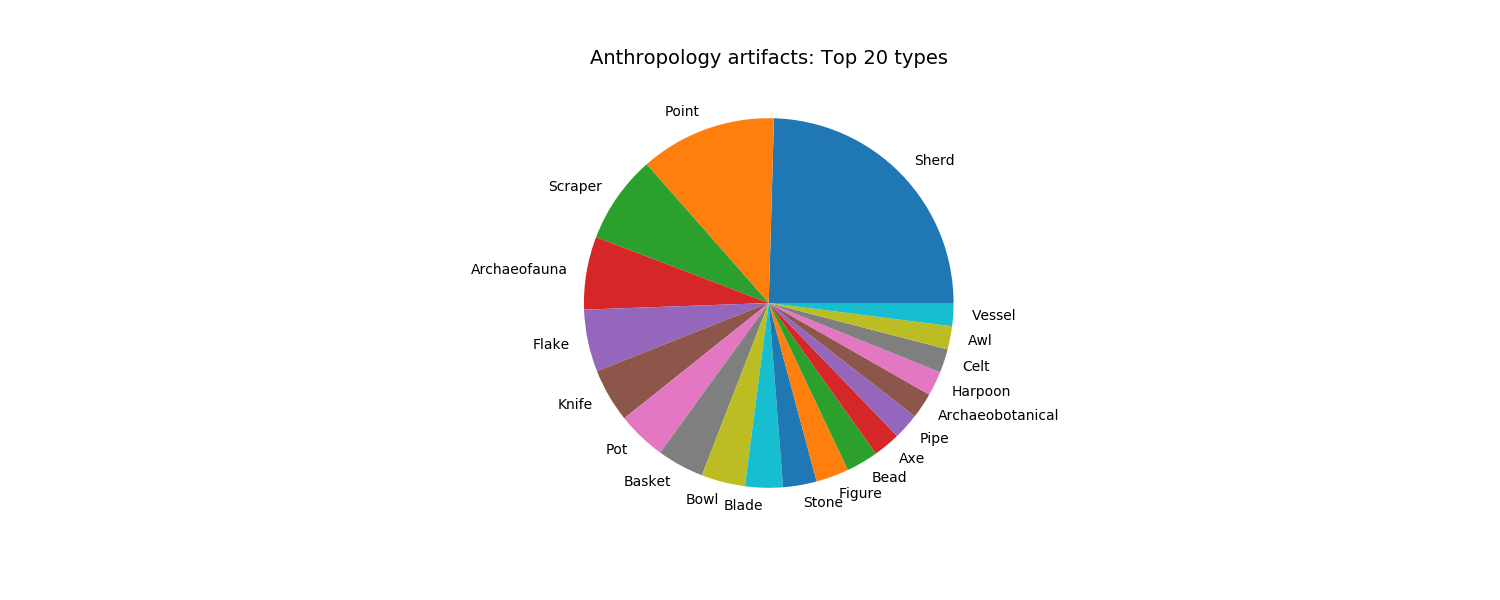

In [25]:
# Pie graph of top artifact types
fig, ax = plt.subplots(figsize=(15, 6))
df_artifact.set_index('object_type')['count'].sort_values(ascending=False).plot(kind='pie')
plt.ylabel('')
plt.title("Anthropology artifacts: Top 20 types", fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 11. </b>Pie Graph of the Top 20 Object Types for Anthropology Artifacts</span>

In [26]:
# Extract top cultures
df_culture = (df_anthro.
 select('content.freetext.culture.content').
 withColumn('culture', F.col('content').getItem(0)).
 filter(F.col('culture') != 'None').
 groupby('culture').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

A more pointed question however might be on the cultures from which these artifacts originate. As it turns out, nearly half of the collection items are prehistoric in origin, with no specifically identifiable culture. For the historic culture artifacts, the most well-represented culture is "Eskimo".

At this point it becomes evident that documentation and curation of artifacts from even humanity's historical past can be a challenge, considering that some of the most frequent labels are "Historic" and "Not Given". For those artifacts that appear properly labelled, many come from Middle Missouri, Zuni, Hopi, and Japanese cultures.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

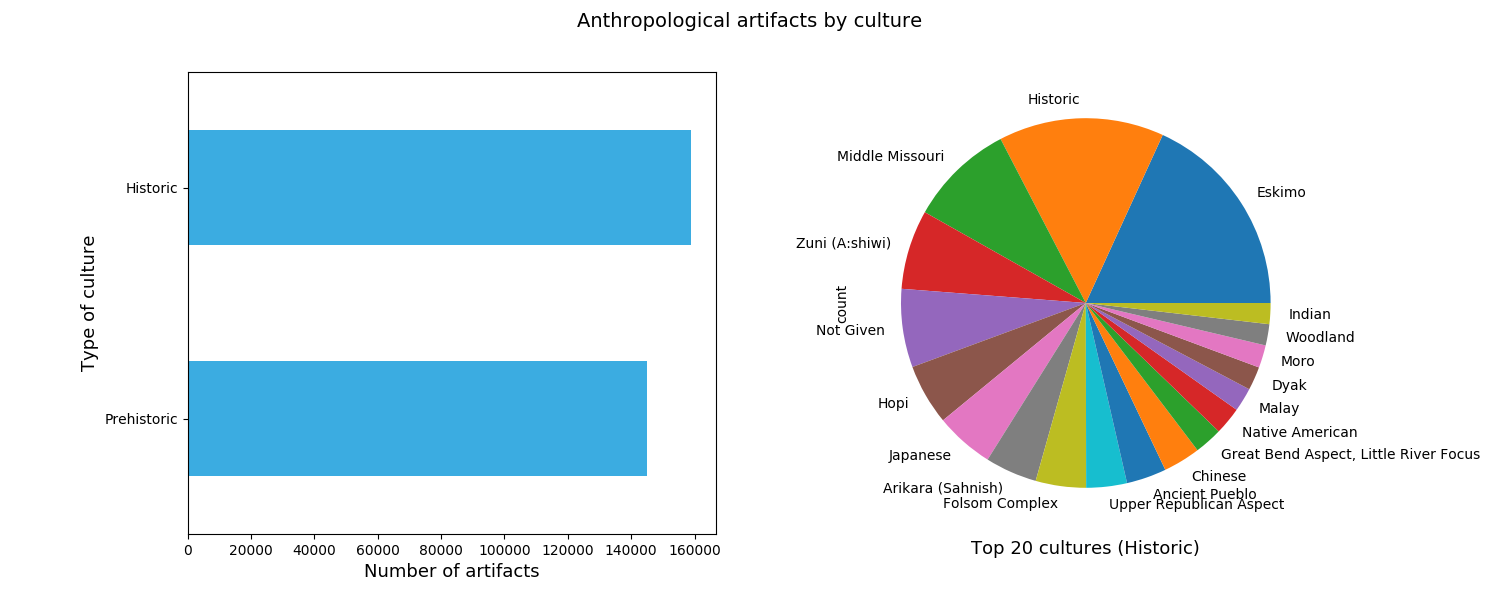

In [27]:
# Get only historic cultures
df_historic = df_culture.iloc[1:]

# Summarize prehistoric and historic
prehist = df_culture.set_index('culture')['count']['Prehistoric']
hist = df_historic.set_index('culture').sum().squeeze()

df_hist = pd.DataFrame([prehist, hist])
df_hist.index = ['Prehistoric', 'Historic']
df_hist.columns = ['count']

# Plot the top cultures
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
df_hist['count'].plot(kind='barh', ax=ax[0], color='#3bace1')
df_historic.set_index('culture')['count'].plot(kind='pie', ax=ax[1])
ax[0].set_xlabel('Number of artifacts', fontsize=13)
ax[0].set_ylabel('Type of culture', fontsize=13)
ax[1].set_xlabel('Top 20 cultures (Historic)', fontsize=13)
plt.suptitle('Anthropological artifacts by culture', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 12. </b>Plots of the Top Origin Cultures for Anthropology Artifacts</span>

The next question of interest involves the dating of the artifacts. The below plot summarizes the number of collection items from various periods of history. It should be noted that the recordkeeping and hence the below plot is not done to scale. For the more recent centuries the breakdown is by decade, but prior to the year 1500 the aggregation is done by century. For periods "before the Common Era" (BCE), labelling is done by millenia. Needless to say, most of the collection items were attributable to recent periods, whereas much of our inheritance from more ancient tribes and civilizations are now lost to time.

In [28]:
# Extract dates of artifacts
df_collection = (df_anthro.
 select('content.indexedStructured.date').
 withColumn('date', F.explode(F.col('date'))).
 groupby('date').
 count().
 orderBy(F.desc('count')).
 toPandas())

# df_collection

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

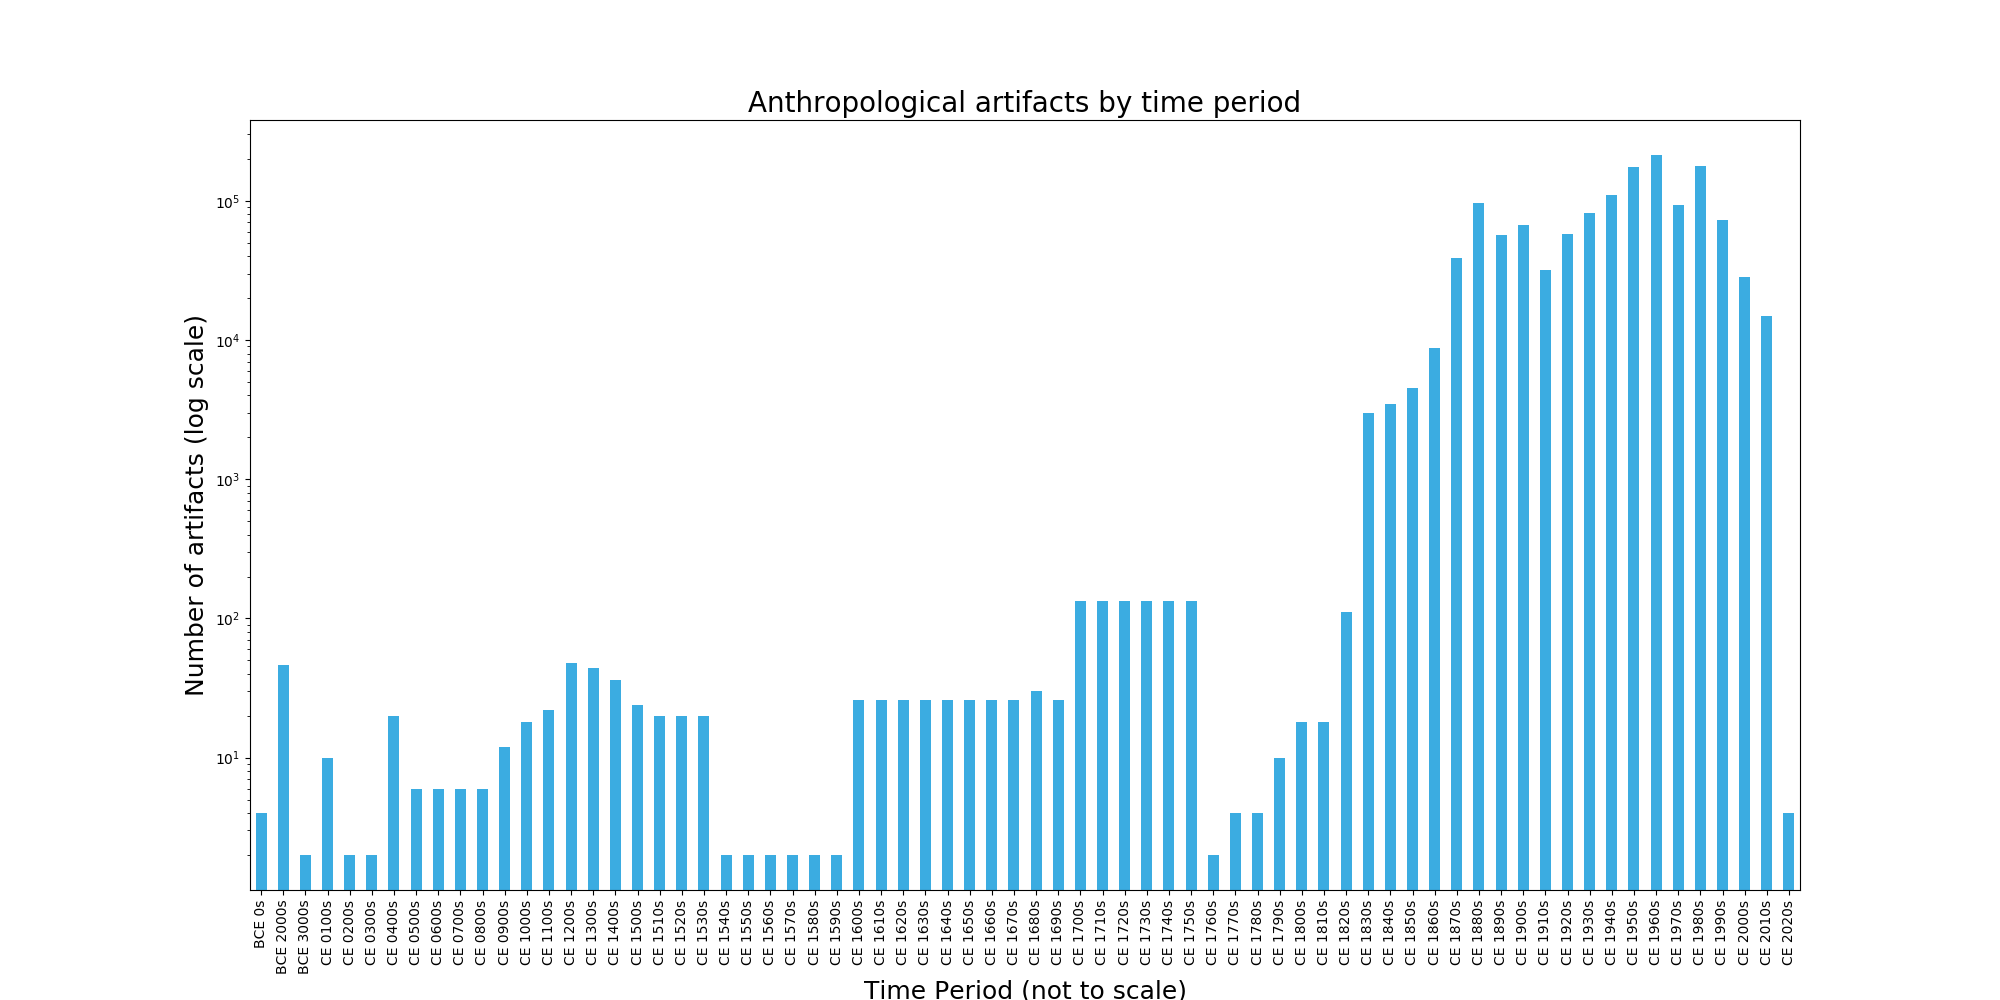

In [29]:
def convert_dates(period):
    """Re-format dates"""
    if len(period) == 4:
        period = '0' + period
    if period.startswith('BCE') is False:
        period = 'CE ' + period
    if period == 'BC 2000':
        period = ' BC 2000'
    if period == 'BC 3000':
        period = '  BC 3000'
    return period

df_coll_label = df_collection.copy()

# Convert the dates to a uniform format
df_coll_label['period'] = df_coll_label['date'].map(convert_dates)

# Plot the artifacts time period
fig, ax = plt.subplots(figsize=(20, 10))
df_coll_label.set_index('period')['count'].sort_index(ascending=True).plot(kind='bar', color='#3bace1')
ax.set_yscale('log')
ax.set_xlabel('Time Period (not to scale)', fontsize=18)
ax.set_ylabel('Number of artifacts (log scale)', fontsize=18)
plt.title('Anthropological artifacts by time period', fontsize=20)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 13. </b>Plot of the Time Period of Anthropology Artifacts</span>

### NMNH Department of Paleobiology

It is not only human culture and history that researchers are interested in, but the history of other biological organisms as well. This is done through paleobiology, the branch of paleontology dealing with the study of fossils of plants, animals, and protists.

Again, it is worthwhile to look at the types of specimen's in the museum's collection. Since this department deals with fossils of once-living things, a convenient way to classify the items is by taxonomic class. The top 20 most frequently found classes are shown below.

In [30]:
# Load all Paleobiology files
df_paleo = spark.read.json('s3a://smithsonian-open-access/metadata/edan/nmnhpaleo/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="font-size:12px;font-style:default;"><b>Table 11. Summary Table of the Top 20 Tax Classes of the NMNH Department of Paleobiology </b><br></span>

In [31]:
# Extract top tax classes
df_phylum = (df_paleo.
 select('content.indexedStructured.tax_class').
 filter(F.col('tax_class').isNotNull()).
 withColumn('tax_class', F.col('tax_class').getItem(0)).
 groupby('tax_class').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_phylum

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         tax_class   count
0     Foraminifera  131782
1         Mammalia  119500
2             Aves   69040
3          Insecta   58460
4   Chondrichthyes   53006
5       Gastropoda   48942
6        Trilobita   44672
7        Ostracoda   44576
8       Pelecypoda   38670
9      Cephalopoda   23584
10       Crinoidea   22864
11    Osteichthyes   20308
12      Echinoidea   18648
13        Reptilia   15796
14     Nautiloidea   13580
15       Conodonta   11416
16            Worm    9098
17      Blastoidea    8922
18       Crustacea    8600
19      Actinopoda    8156

Apparently the most common fossil type are Foraminifera, which are simple, single-celled and amoeba-like protists. According to the British Geologic Survey, fossils of these are found in sediments as old as 545 million years ago, and foraminifera themselves can still be found today in marine waters.

Other common fossils are those of mammals (Mammalia), birds (Aves), insects (Insecta), and cartilaginous fishes (Chondrichthyes).

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

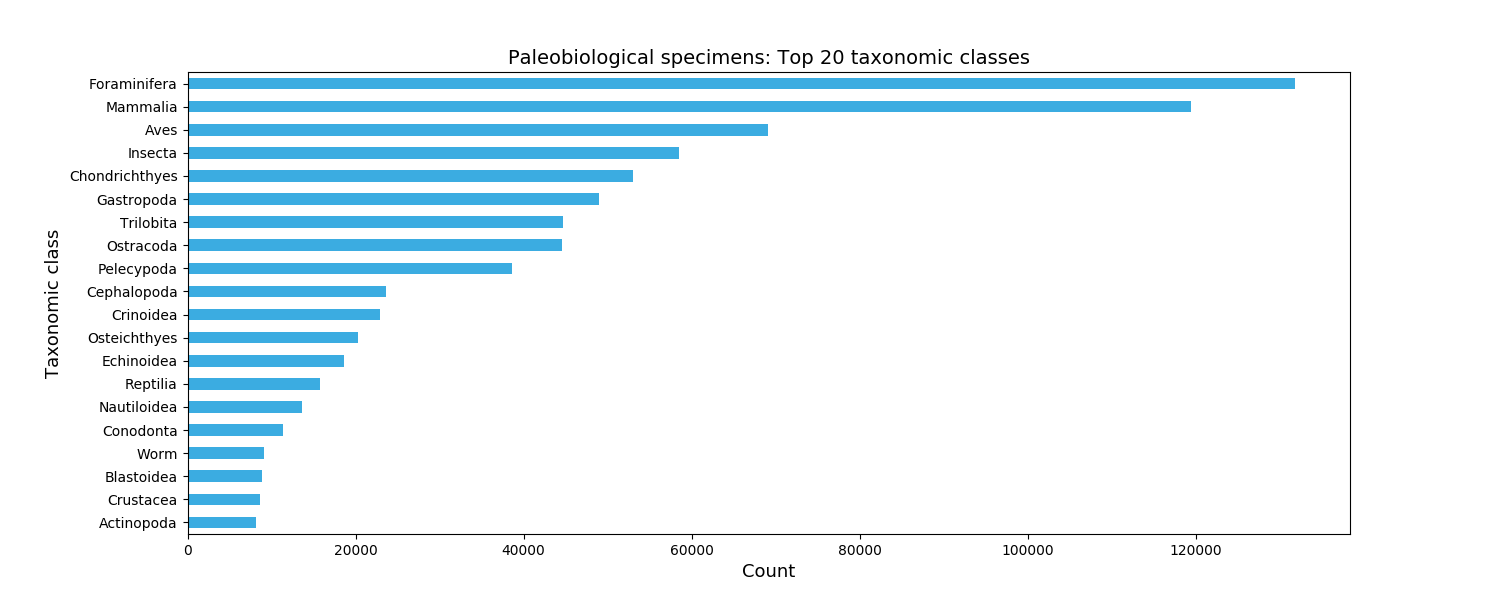

In [32]:
# Plot top taxonomic classes
fig, ax = plt.subplots(figsize=(15, 6))
df_phylum.set_index('tax_class')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Taxonomic class', fontsize=13)
ax.set_xlabel('Count', fontsize=13)
plt.title('Paleobiological specimens: Top 20 taxonomic classes', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 14. </b>Plot of the Top 20 Tax Classes of Paleobiological Specimens</span>

In [33]:
# Extract geological eras
df_era = (df_paleo.
 select('content.indexedStructured.geo_age-era').
 filter(F.col('geo_age-era').isNotNull()).
 withColumn('geo_age', F.col('geo_age-era').getItem(0)).
 groupby('geo_age').
 count().
 orderBy(F.desc('count')).
 toPandas())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Looking at the distribution of specimens by geologic era, most specimens are from the Paleozoic era (541-252 million years ago), Mesozoic (252-66 million years ago), and Precambrian period (4.6 billion years ago to 541 million years ago. Some of the records are labeled with more specific periods within the Precambrian, namely the Proeterozoic (both meso and neo eras), and the older Archaean era. *(Windley, B. Frederick, n.d.)* It should be noted that the below plot is drawn to log scale.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

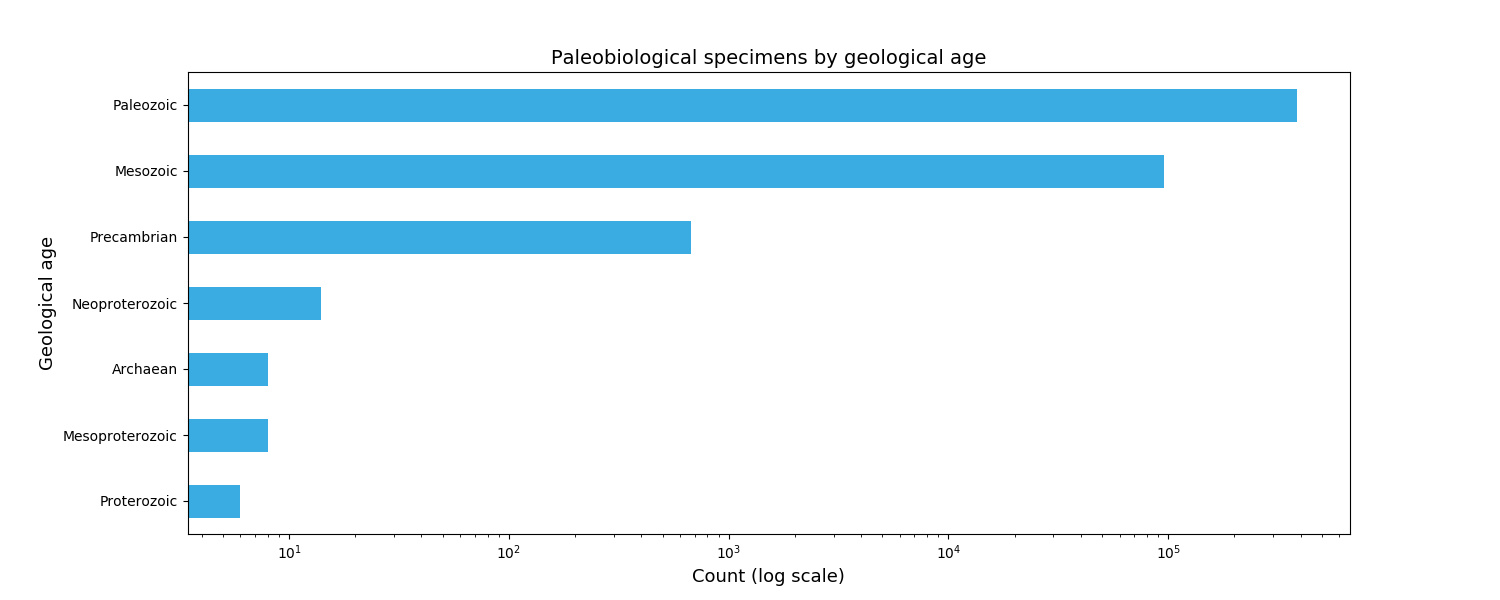

In [34]:
df_era_edited = df_era.set_index('geo_age')['count'].copy()
df_era_edited['Paleozoic'] = (df_era_edited['Paleozoic'] +
                              df_era_edited['paleozoic'])
df_era_edited = df_era_edited.iloc[1:-1]

# Plot specimens by geological age
fig, ax = plt.subplots(figsize=(15, 6))
df_era_edited.sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_xlabel('Count (log scale)', fontsize=13)
plt.xscale('log')
ax.set_ylabel('Geological age', fontsize=13)
plt.title('Paleobiological specimens by geological age', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 15. </b>Plot of the Paleobiological Specimens by Geological Age</span>

### NMNH Department of Mineral Sciences

Focusing on non-living matter, the Department of Mineral Sciences seek to understand the evolution of the Earth as well as the solar system, by studying minerals and gems found in terrestrial rocks and meteorites.

Once more it would be interesting to look at the countries from where the most mineral samples are sourced.

In [35]:
# Load all Mineral Sciences files
df_minsci = spark.read.json('s3a://smithsonian-open-access/metadata/edan/nmnhminsci/??.txt')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="font-size:12px;font-style:default;"><b>Table 12. Summary Table of the Top 20 Source Countries of the NMNH Department of Mineral Sciences</b><br></span>

In [36]:
# Extract top 20 source countries
df_minsource = (df_minsci.
 select('content.indexedStructured.geoLocation.L2.content').
 withColumn('country', F.col('content').getItem(0)).
 filter(F.col('country') != 'None').
 groupby('country').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_minsource

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           country   count
0    United States  417453
1       Antarctica   81674
2           Mexico   36736
3          Germany   26690
4           Canada   22540
5        Australia   18958
6            Italy   17290
7   United Kingdom   15528
8     South Africa   14062
9           Brazil   11824
10         Unknown   11459
11         Namibia    8906
12          Russia    8806
13          France    8646
14     Switzerland    7982
15          Norway    7658
16           Japan    6658
17          Sweden    6404
18           Chile    6146
19  Czech Republic    5466

Once more it's observed that the majority of mineral samples are found in the United States. Of greater interest is the fact that the second largest source of mineral samples is Antartica. As it turns out, the continent's harsh climate and resulting lack of vegetation provides unique insight on geological processes and how rock formation occurs in the Earth's crust. *(Norwegian Polar Institute, n.d.)*

Other nations popular with geologists include Mexico, Germany, and Canada.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

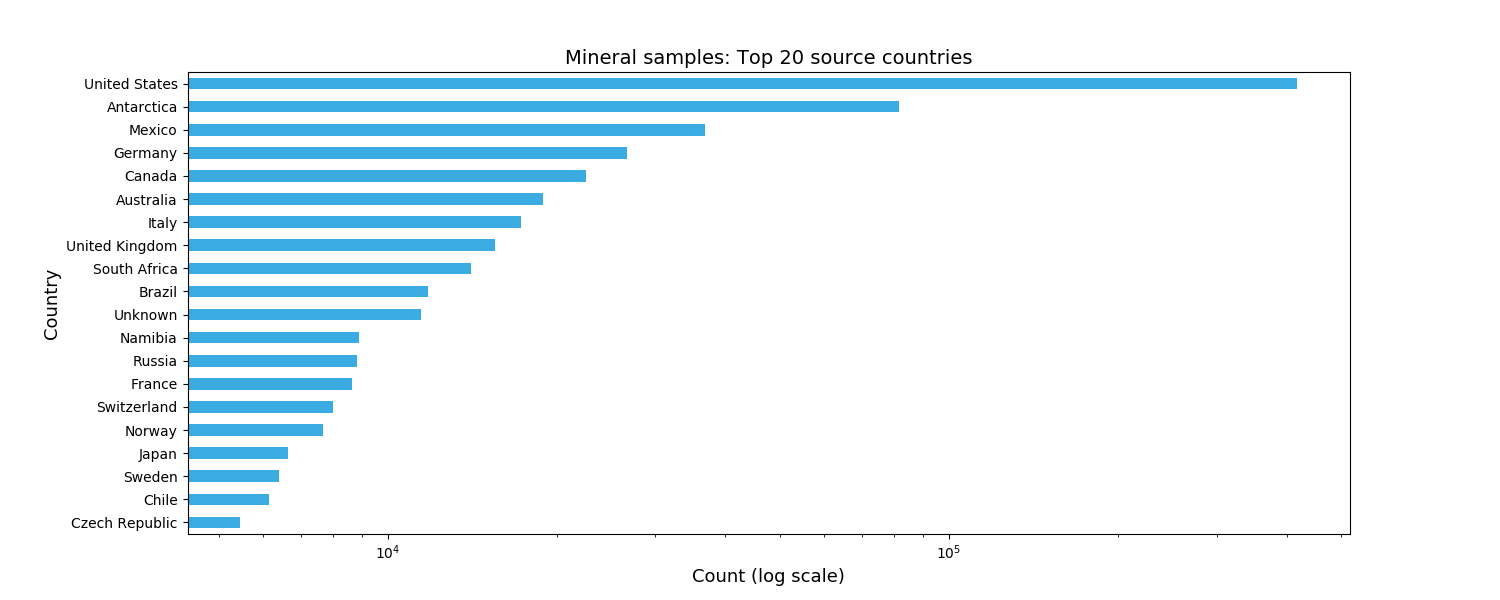

In [37]:
# Plot top source countries
fig, ax = plt.subplots(figsize=(15, 6))
df_minsource.set_index('country')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_xscale('log')
ax.set_xlabel('Count (log scale)', fontsize=13)
ax.set_ylabel('Country', fontsize=13)
plt.title('Mineral samples: Top 20 source countries', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 16. </b>Plot of the Top 20 Source Countries for Mineral Samples</span>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

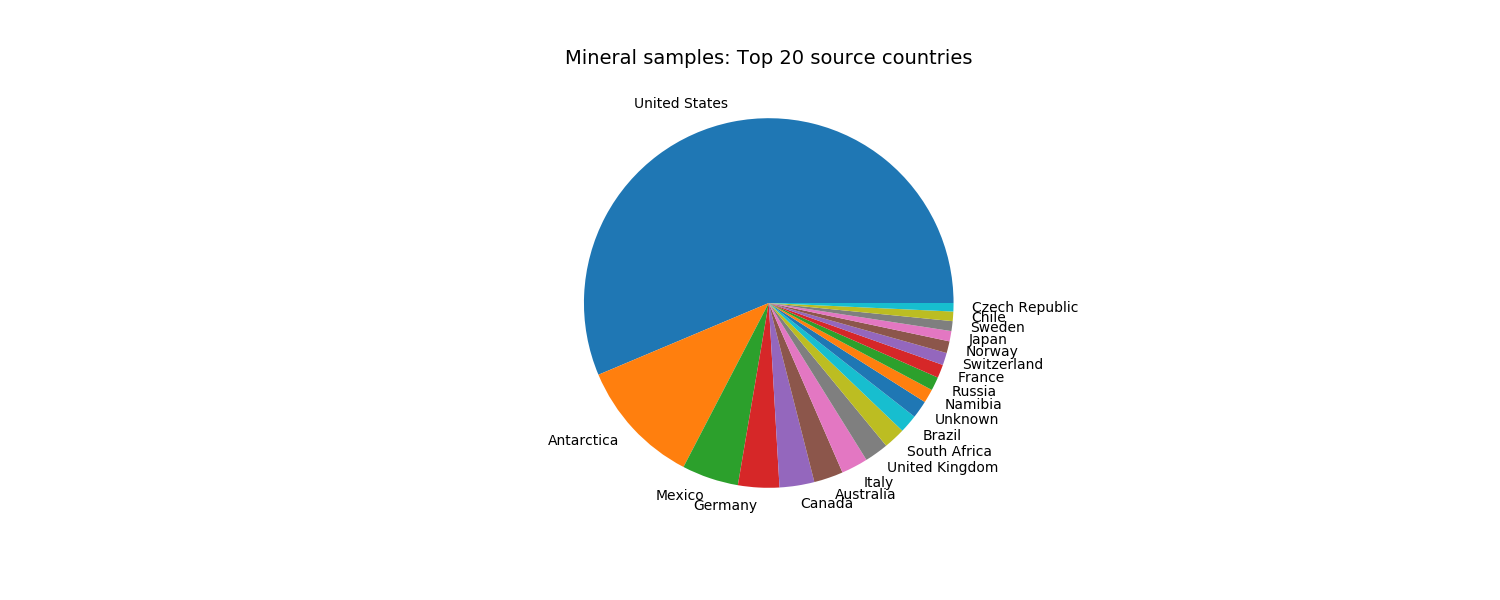

In [38]:
# Pie graph of top source countries
fig, ax = plt.subplots(figsize=(15, 6))
df_minsource.set_index('country')['count'].plot(kind='pie')
ax.set_ylabel('')
plt.title('Mineral samples: Top 20 source countries', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 17. </b>Pie Graph of the Top 20 Source Countries for Mineral Samples</span>

<span style="font-size:12px;font-style:default;"><b>Table 13. Summary Table of the Top 20 Mineral Types of the NMNH Department of Mineral Sciences</b><br></span>

In [39]:
# Extract top mineral types
df_mintype = (df_minsci.
 select('content.indexedStructured.scientific_name').
 withColumn("mineral",
            F.explode(F.col("scientific_name"))).
 groupby('mineral').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_mintype

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          mineral  count
0          Quartz  43262
1    Unidentified  27422
2          Basalt  25918
3         Calcite  24896
4   Glassy basalt  17604
5          Pyrite  12128
6         Granite   9342
7         Olivine   8508
8         Biotite   8434
9          Galena   7838
10       Fluorite   7772
11      Limestone   7494
12     Sphalerite   7448
13     Silver ore   7220
14            Ore   6984
15    Plagioclase   6982
16      Magnetite   6684
17     Hornblende   6669
18         Garnet   6648
19      Muscovite   6540

As for the types of minerals themselves, by far the most common type is quartz. As it turns out, quartz is indeed the Earth's most common mineral, being composed of the two most abundant chemical elements on Earth: oxygen and silicon. *(Earth Sciences Museum, 2013)*

The next most frequent label is "unidentified", followed by basalt, calcite, and glassy basalt.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

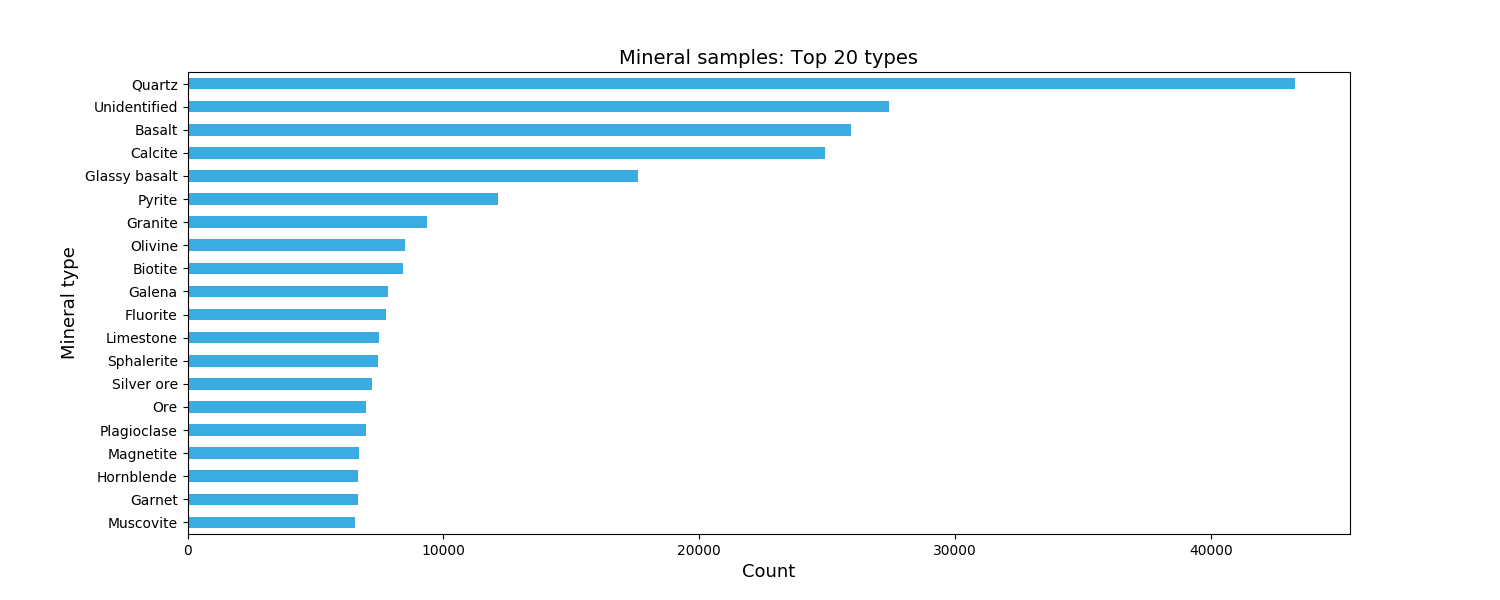

In [40]:
# Plot top mineral samples
fig, ax = plt.subplots(figsize=(15, 6))
df_mintype.set_index('mineral')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Mineral type', fontsize=13)
ax.set_xlabel('Count', fontsize=13)
plt.title('Mineral samples: Top 20 types', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 18. </b>Plots of the Top 20 Types of Mineral Samples</span>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

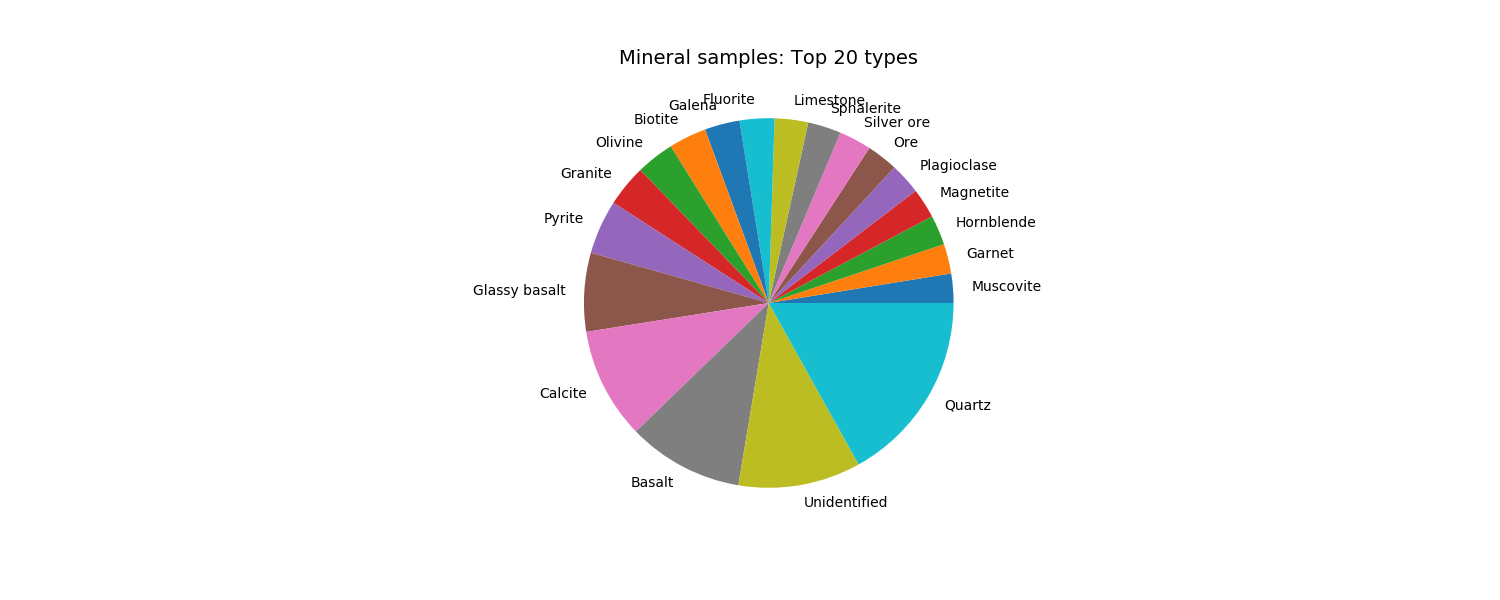

In [41]:
# Pie graph of top mineral samples
fig, ax = plt.subplots(figsize=(15, 6))
df_mintype.set_index('mineral')['count'].sort_values(ascending=True).plot(kind='pie')
ax.set_ylabel('')
ax.set_xlabel('')
plt.title('Mineral samples: Top 20 types', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 19. </b>Pie Graph of the Top 20 Types of Mineral Samples</span>

### NMNH Department of Vertebrate Zoology

Next, the data is examined for the Department of Vertebrate Zoology, which has various sub-divisions focusing on birds, fish, herpetology (reptiles and amphibians), and mammals, respectively. A useful way of classifying the data is by taxonomic class of the specimen.

<span style="font-size:12px;font-style:default;"><b>Table 14. Summary Table of the Top 11 Tax Classes of the NMNH Department of Vertebrate Zoology</b><br></span>

In [42]:
# Vertebrate Zoology divisions of focus
l_vert = ['NMNHBIRDS', 'NMNHFISHES', 'NMNHHERPS', 'NMNHMAMMALS']

# Extract top tax classes
df_verbtypes = (df_nmnh.
 filter(F.col('unitCode').isin(l_vert)).
 select('content.indexedStructured.tax_class').
 withColumn('tax_class', F.col('tax_class').getItem(0)).
 filter(F.col('tax_class').isNotNull()).
 groupby('tax_class').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_verbtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

             tax_class    count
0             Mammalia  1234169
1                 Aves  1132693
2       Actinopterygii   930265
3             Amphibia   782842
4             Reptilia   380850
5       Chondrichthyes    19946
6   Cephalaspidomorphi     1190
7      Cephalochordata     1036
8               Myxini      304
9        Sarcopterygii       84
10      Elasmobranchii        4

It would seem that the most common classes represented in the NMNH collections are Mammalia (mammals) and Aves (birds), despite these having evolved relatively recently in the vetebrate tree of life. *(Bush, n.d.)* A similar observation may be made for Amphibia (amphibians) and Reptilia (reptiles) which made it to the top 5 list, following Actinopterygii (ray-finned fishes).

It may be that as human beings, we prefer to study creatures that are closer to us evolutionarily. Another possible explanation is that such specimens may be easier to collect, especially compared to those belonging to the many classes of fish like Chondrichthyes (cartilaginous fishes) and Cephalaspidomorphi (jawless fish).

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

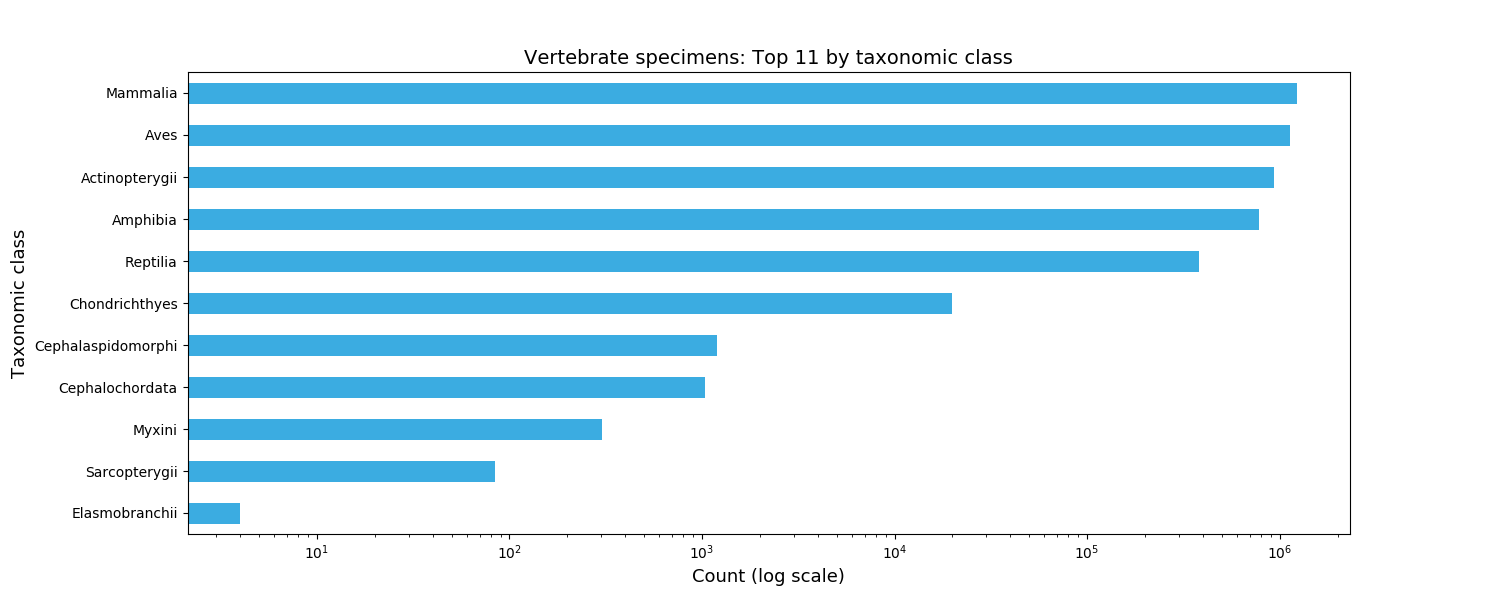

In [43]:
# Plot top taxonomic class
fig, ax = plt.subplots(figsize=(15, 6))
df_verbtypes.set_index('tax_class')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Taxonomic class', fontsize=13)
ax.set_xscale('log')
ax.set_xlabel('Count (log scale)', fontsize=13)
plt.title('Vertebrate specimens: Top 11 by taxonomic class', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 20. </b>Plot of the Top 11 Tax Classes of Vertebrate Specimens</span>

This also raises the question as to how these specimens are collected and who are responsible. While many of the collectors are unknown, there are indeed prolific researchers who are able to contribute tens of thousands of specimens to the museum. Without the tireless effort of such individuals, the museum's vertebrate collections and their reseach would certainly not be as advanced as it is today.

<span style="font-size:12px;font-style:default;"><b>Table 15. Summary Table of the Top 20 Collectors of the NMNH Department of Vertebrate Zoology</b><br></span>

In [44]:
# Extract top collectors
df_collector = (df_nmnh.
 filter(F.col('unitCode').isin(l_vert)).
 select('content.freetext.name.label', 'content.freetext.name.content').
 withColumn('new', F.arrays_zip("label", "content")).
 withColumn('new', F.explode(F.col('new'))).
 select('new').
 filter(F.col('new.label') == 'Collector').
 select('new.content').
 withColumnRenamed('content', 'collector').
 groupby('collector').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_collector

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                         collector   count
0                Collector Unknown  137194
1              Jeffrey T. Williams   90122
2                Alexander Wetmore   63312
3                    E. A. Goldman   51222
4               Thomas D. Burleigh   50584
5               M. A. Carriker JR.   48150
6   Smithsonian Venezuelan Project   46250
7               Victor G. Springer   42614
8                Carole C. Baldwin   40312
9                   David G. Smith   34786
10                 Edgar A. Mearns   32479
11                       V. Bailey   25994
12                    E. W. Nelson   25885
13                    Serge Planes   25670
14                          Nelson   22109
15               Kent E. Carpenter   21592
16                    J. A. Loring   21456
17           Dr. Bruce B. Collette   20906
18                 John E. Randall   20192
19                   W. M. Perrygo   19952

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

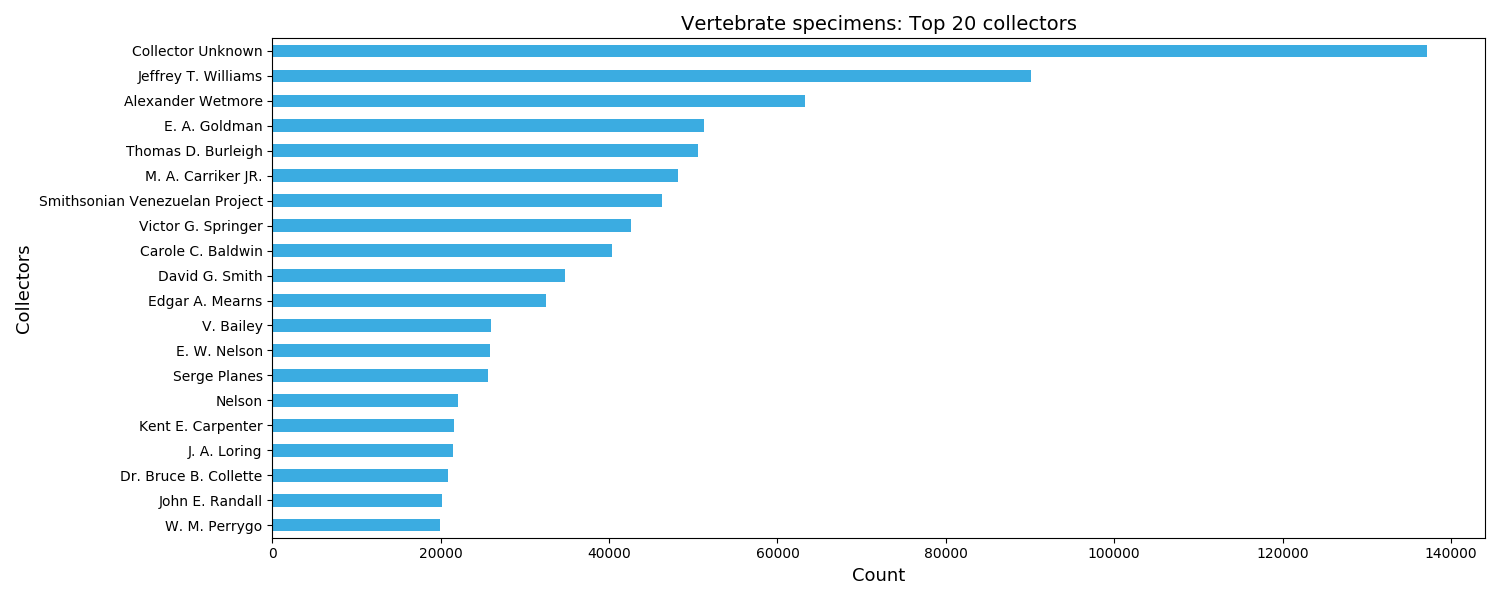

In [45]:
# Plot top vertebrate specimen collectors
fig, ax = plt.subplots(figsize=(15, 6))
df_collector.set_index('collector')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Collectors', fontsize=13)
ax.set_xlabel('Count', fontsize=13)
plt.title('Vertebrate specimens: Top 20 collectors', fontsize=14)
fig.tight_layout()
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 21. </b>Plot of the Top 20 Collectors of Vertebrate Specimens</span>

### NMNH Departments of Entomology and Invertebrate Zoology

Last but not least, the records pertaining NMNH's invertebrate collections are examined. To this end, the records of the Entomology and Invertebrate Zoology Departments are combined to get a view of vertebrates' older and vastly more numerous cousins. It is worth noting that all vertebrates  comprise just one sub-phylum under the main phylum Chordata, whearas inverebrates span 9 dedicated phyla, in addition to the invertebrate chordates. *(Wikipedia contributors, 2022)* Indeed, it is interesting that there is a separate department focusing on entomological research on insects as well as arachnids and myriapods, despite entomology being a field under invertebrate zoology.

<span style="font-size:12px;font-style:default;"><b>Table 16. Summary Table of the Top 20 Tax Classes of the NMNH Departments of Entomology and Invertebrate Zoology</b><br></span>

In [46]:
# Divisions of focus
l_inv = ['NMNHENTO', 'NMNHINV']

# Extract top tax classes
df_invtypes = (df_nmnh.
 filter(F.col('unitCode').isin(l_inv)).
 select('content.indexedStructured.tax_class').
 withColumn('tax_class', F.col('tax_class').getItem(0)).
 filter(F.col('tax_class').isNotNull()).
 groupby('tax_class').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_invtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       tax_class    count
0     Gastropoda  1242762
1        Insecta  1191611
2   Malacostraca   638993
3     Polychaeta   439638
4       Bivalvia   429144
5       Anthozoa   185003
6    Maxillopoda   111992
7    Chromadorea    69562
8    Ophiuroidea    52353
9     Asteroidea    51211
10      Hydrozoa    45626
11   Cephalopoda    40240
12  Demospongiae    39664
13    Echinoidea    38138
14     Trematoda    37047
15   Oligochaeta    35308
16    Ascidiacea    32598
17       Cestoda    32585
18     Ostracoda    27689
19   Adenophorea    26907

Perhaps not surprisingly, the taxonomic classes of invertebrates are less familiar to a layman. Topping the list are Gastropoda, which a well-read individual might recognize as comprising snails and slugs, as well as the more familiar Insecta. Also making it to the top 5 are Malacostraca (one of six classes of crustaceans), Polychaeta (bristle worms), and the more intuitively named Bivalvia (a class of molluscs).

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

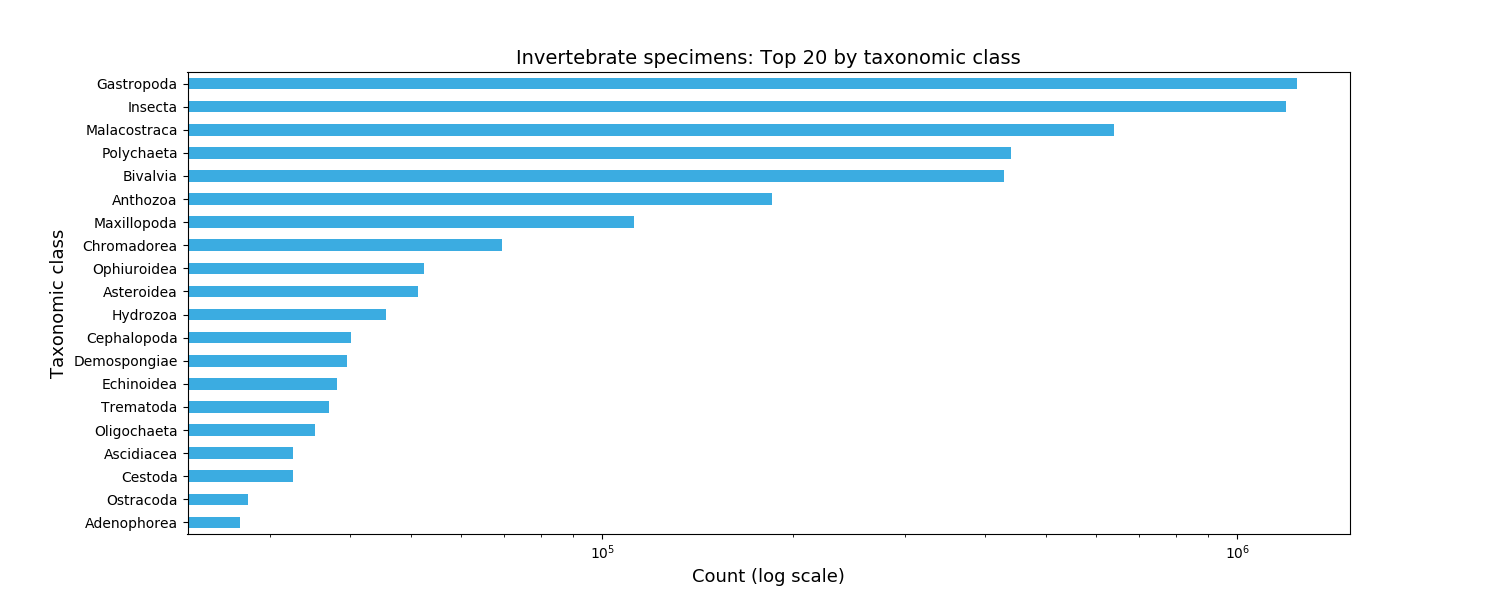

In [47]:
# Plot top invertebrate specimen tax classes
fig, ax = plt.subplots(figsize=(15, 6))
df_invtypes.set_index('tax_class')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Taxonomic class', fontsize=13)
ax.set_xscale('log')
ax.set_xlabel('Count (log scale)', fontsize=13)
plt.title('Invertebrate specimens: Top 20 by taxonomic class', fontsize=14)
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 22. </b>Plot of the Top 20 Tax Classes of Invertebrate Specimens</span>

As for the contributors who worked tirelessly to provide the museum with numerous specimens to house in their collections, it is interesting to note that they are mostly institutions. This is quite different from vertebrate research, whose collectors are mainly individuals. Prolific contributors include the United States Fish Commission, the University of Southern California, and the Battle/Woods Hole Oceanographic Institute for BLM/MMS. Many of the specimens are uncredited however, with "Not Stated" making it second on the top 20 list.

<span style="font-size:12px;font-style:default;"><b>Table 17. Summary Table of the Top 20 Collectors of the NMNH Departments of Entomology and Invertebrate Zoology</b><br></span>

In [48]:
# Divisions of focus
l_inv = ['NMNHENTO', 'NMNHINV']

# Extract top collectors
df_inv_collector = (df_nmnh.
 filter(F.col('unitCode').isin(l_inv)).
 select('content.freetext.name.label', 'content.freetext.name.content').
 withColumn('new', F.arrays_zip("label", "content")).
 withColumn('new', F.explode(F.col('new'))).
 filter(F.col('new.label') == 'Collector').
 select('new.content').
 withColumnRenamed('content', 'collector').
 groupby('collector').
 count().
 orderBy(F.desc('count')).
 limit(20).
 toPandas())

df_inv_collector

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                            collector   count
0                       United States Fish Commission  304003
1                                        [Not Stated]  152381
2                   University of Southern California   69957
3   Battelle/Woods Hole Oceanographic Institute fo...   67654
4        Battelle-New England Marine Lab For BLM/ MMS   64178
5                                   John B. Henderson   51206
6                                 University of Texas   48902
7            Smithsonian Oceanographic Sorting Center   43194
8                     Texas Instruments For BLM / MMS   42340
9                                        L. W. Macior   40612
10          Continental Shelf Associates for BLM/ MMS   33664
11            Smithsonian Tropical Research Institute   31552
12                               Dr. Waldo L. Schmitt   28052
13    LGL Ecological Research Associates For BLM/ MMS   26964
14              Virginia Institute of Marine Sciences   26862
15      

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

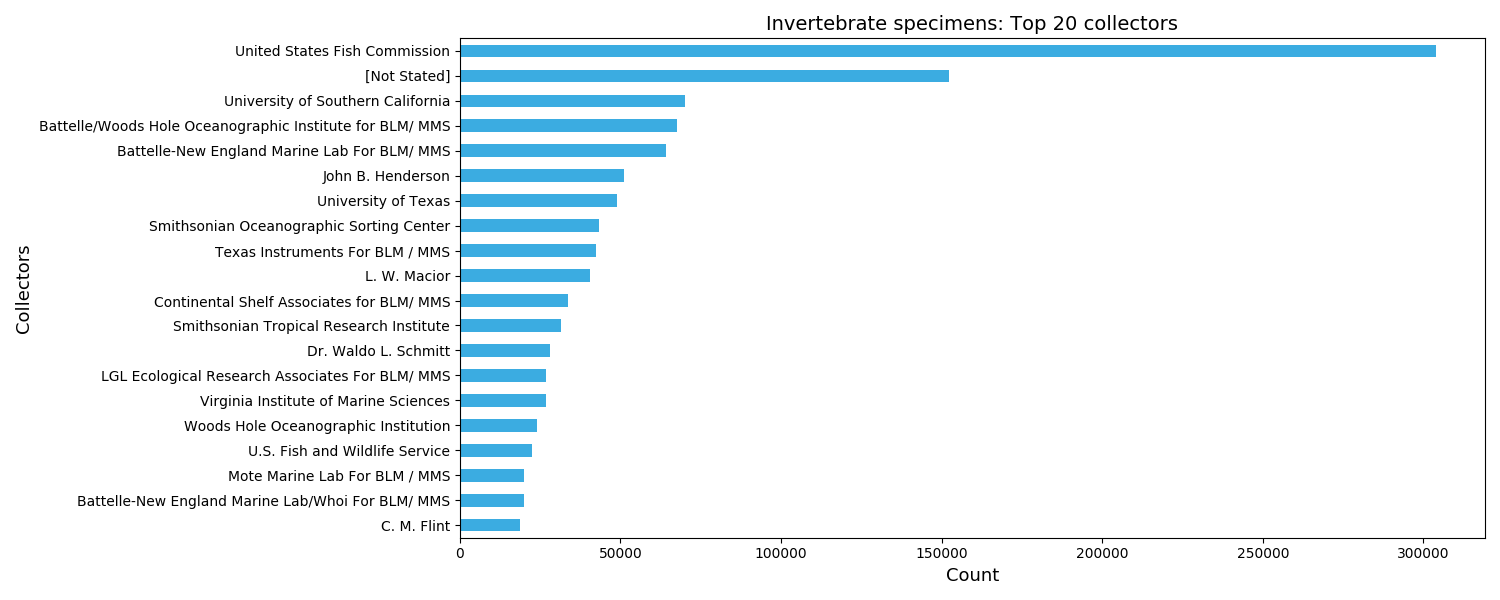

In [49]:
# Plot top invertebrate specimen collectors
fig, ax = plt.subplots(figsize=(15, 6))
df_inv_collector.set_index('collector')['count'].sort_values(ascending=True).plot(kind='barh', color='#3bace1')
ax.set_ylabel('Collectors', fontsize=13)
ax.set_xlabel('Count', fontsize=13)
plt.title('Invertebrate specimens: Top 20 collectors', fontsize=14)
fig.tight_layout()
plt.show()
%matplot plt

<span style="font-size:12px;color:gray"><b>Figure 23. </b>Plot of the Top 20 Collectors of Invertebrate Specimens</span>

## Summary and Discussion of Findings

As the Smithsonian might arguably be the greatest storehouse and curator of humanity's knowledge, the wealth of data available in its Open Access repository is too vast to even summarize in a book, much less one paper. However looking at its data with focus on the NMNH as the largest and most prolific of its institutions is already an educational experience in and of itself, while offering an enticing glimpse of what the Smithsonian has to offer.

It may be worthwhile to note that images may be queried on the Smithsonian Open Access portal (https://www.si.edu/openaccess), however the web portal only yields sample images based on keywords, and does not provide any means by which one might compile meaningful facts and statistics, or indeed view the data in any aggregate manner. Fortunately, advanced computational tools allow researchers to do just that. Even with simple summary plots, one can already glean trivia and insight into how data is collected, but also where interest focus (or research biases) may exist. To recap some examples:

* The Smithsonian obtains its collection items primarily from US sources. Also, looking at all its culture-related collections, most items relate to the Americas. This underscores how the Smithsonian, while certainly world-class, may still be considered a national (i.e. American) institution of research rather than a global one.
* The National Museum of National History (NMNH) is by far the most prolific collector of items and creator of digital media, already generating 11 folder and 54 GB of collection metadata as well as 6,837,773 files comprising 606.4 terabytes of media data. This data generated by the NMNH is easily greater than that of all the other Smithsonian museums combined.
*  Some top donors for the musuem include: Jeffrey T. Williams (for vertebrates), the United States Fish Commission (for invertebrates), and the River Basin Survey (for anthropological research and overall for the Smithsonian).
* Within the NMNH, the Department of Botany has the largest collection, with a number of records already surpassing all other Smithsonian museums.
* Grasses and sedges such as *Carex* are the most common speciments in the NMNH Botany collection.
* Sherds, points, and scrapers are the most common types of anthropological artifacts, while Eskimo is the most common origin culture of these artifacts. Unsurprisingly, the size of the NMNH Anthropology Department's collection is weighted towards more recent periods compared to ancient ones.
* Paleobiological research focuses mostly on single-celled protists (Foraminifera), followed by mammals, birds, and insects.
* Following the United States, most geological samples in the Mineral Science collection comes from Antartica. Also, the most common type of mineral in the collection is quartz.
* Vertebrate research leans disproportionately towards more recently-evolved animals or humanity's closer relatives, including mammals, birds, reptiles, and amphibians.
* The top invertebrate specimens by taxonomic class are Gastropoda, Insecta, and Malacostraca.

## Conclusion

While exploring big data is a challenge, it is by no means impossible. Sifting through the Smithsonian Open Access Data Repository may seem like a daunting task, but its availability on the **Amazon Web Service** cloud computing platform as a public dataset makes it possible without the need to download terabytes of data. Moreoever, the opportunity that AWS provides to setup virtual clusters using **Elastic MapReduce (EMR)** housing distributed computing analytics frameworks like **Apache Spark** provides analysts with tools to compile summary statistics and generate plots even for datasets as large as the Smithsonian's.

Indeed, it was found that there is much to learn by simply querying top (i.e. most frequently found) categories in the repository data, whether such the categories relate to source country, collector name, origin culture, artifact period, mineral sample type, plant genus, or animal class. It may not always be possible to visit the musuem in person, but information technology still allows enthusiasts to sift through the museum's archives and browse through its digital media. (Again, for non-programmers, this may easily be done on the Smithsonian Open Access  portal on https://www.si.edu/openaccess.)

In addition to satisfying one's curiosity, one learns of the Smithsonian's research tendencies as well; for instance it appears that cultures in the Americas are highly well-studied and represented in the database, but the same cannot be said for more far-flung regions from the US, such as those in Asia.

## Recommendations

A common tenet of research and cultural, historical, or scientific inquiry is that knowledge is truly valuable for its own sake, even when it does not always yield actionable recommendations. Still, the pursuit of knowledge cannot be free of practical considerations, and the analysts of this study humbly propose some ways in which the Smithsonian Institute might improve the diversity and accessibility of its collections.

* Since American sub-cultures are already highly represented in the Smithsonian collections, they might wish to collaborate with other musuems and research institutions around the globe to trade artificts and setup exhibits. This may help further introduce Americans and foreign tourists alike to the diversity of human cultures from other regions.
* Similarly, most of the biological specimens are also sourced from North and Latin America, however much of the world's bio-diversity is located in other regions, including tropical South and Southeast Asia, and Australia. The Smithsonian might wish to devote some of its resources to biological surveys in these regions, or collaborate with (and provide resarch funding to) scientific teams located in these areas, to enhance the balance and diversity in their exhibits. 
* The Smithsonian Open Access portal allows users to input search keywords to browse the media images, however it may be useful to provide data plotting, summarization, or downloading features as well.

The analysts would like to propose some areas for further study as well:

* Explore other categories and fields in the database in greater depth, for example collection dates for extensive time-series analyses. This in turn might be correlated with external data on research grants, to see how funding corresponds to expansions in the Smithsonian's collections.
* Explore other Smithsonian museums in-depth, aside from the Museum of Natural History. There are many musuems dedicated to art, or specific sub-cultures, or technology, and it would be interesting to compare and contrast these. It would also be interesting to know more about the specific collection items of the Smithsonian Insitution Archives (SIA).
* Conduct separate studies on the Smithsonian Garden and National Zoological Park. Since these house living specimens, they are not museums in the most traditional sense, and there may be unique insights into how their records and collections evolve and are managed over time.
* Examine the record of timestamps on when the database was updated, to provide insight on the data repository itself, and how it was compiled and enabled to reach its current state.

## References

American Anthropological Association. (n.d.). What is Anthropology? https://www.americananthro.org/AdvanceYourCareer/Content.aspx?ItemNumber=2150

Big Data Platform – Amazon EMR – Amazon Web Services. (n.d.). Amazon Web Services, Inc. Retrieved March 5, 2022, from https://aws.amazon.com/emr/

Bush, V. (n.d.). Animals: Vertebrates | Organismal Biology. Georgia Tech Biological Sciences. https://organismalbio.biosci.gatech.edu/biodiversity/animals-vertebrates-1-2019/

Carex / Sedges. (n.d.). Gardenia.Net. https://www.gardenia.net/plants/plant-family/carex_--_sedges

Earth Sciences Museum. (2013, October 9). Quartz. https://uwaterloo.ca/earth-sciences-museum/resources/detailed-rocks-and-minerals-articles/quartz

Foraminifera. (2021, September 9). British Geological Survey. https://www.bgs.ac.uk/discovering-geology/fossils-and-geological-time/foraminifera/

National Museum of Natural History. (n.d.). Our Research. Smithsonian National Museum of Natural History. https://naturalhistory.si.edu/research

Norwegian Polar Institute. (n.d.). Geology of Antarctica. https://www.npolar.no/en/themes/geology-of-antarctica/

Rogers Archaeology Lab. (2014, September 10). How the River Basin Surveys Shaped Historical Archaeology. Retrieved March 5, 2022, from https://nmnh.typepad.com/rogers_archaeology_lab/2014/09/rbsshapedhistoricalarchaeology.html

Smithsonian Open Access. (n.d.). Smithsonian Institution. https://www.si.edu/openaccess

What is Amazon EMR? - Amazon EMR. (n.d.). Amazon Web Services, Inc. Retrieved March 5, 2022, from https://docs.aws.amazon.com/emr/latest/ManagementGuide/emr-what-is-emr.html

What is AWS. (2020). Amazon Web Services, Inc. Retrieved March 5, 2022, from https://aws.amazon.com/what-is-aws/?trkCampaign=acq_paid_search_brand&sc_channel=PS&sc_campaign=acquisition_PH&sc_publisher=Google&sc_category=Cloud%20Computing&sc_country=PH&sc_geo=APAC&sc_outcome=acq&sc_detail=amazon%20web%20server&sc_content=%7Badgroup%7D&sc_matchtype=p&sc_segment=526188887256&sc_medium=ACQ-P%7CPS-GO%7CBrand%7CDesktop%7CSU%7CCloud%20Computing%7CEC2%20AMD%7CPH%7CEN%7CSitelink&s_kwcid=AL!4422!3!526188887256!p!!g!!amazon%20web%20server&ef_id=CjwKCAiAjoeRBhAJEiwAYY3nDG_DozECRS38S6dPkxic9I7A2SYtD8UEttJM8valS-DwEpaIxg5oShoCV7YQAvD_BwE:G:s&s_kwcid=AL!4422!3!526188887256!p!!g!!amazon%20web%20server

Wikipedia contributors. (2022, February 22). National Museum of Natural History. Wikipedia. https://en.wikipedia.org/wiki/National_Museum_of_Natural_History

Wikipedia contributors. (2022a, February 14). Invertebrate. Wikipedia. https://en.wikipedia.org/wiki/Invertebrate

Wikipedia contributors. (2022, February 9). Waldo Rudolph Wedel. Wikipedia. Retrieved March 5, 2022, from https://en.wikipedia.org/wiki/Waldo_Rudolph_Wedel

Wikipedia contributors. (2022c, March 1). Smithsonian Institution. Wikipedia. https://en.wikipedia.org/wiki/Smithsonian_Institution

Windley, B. Frederick (n.d.). Precambrian. Encyclopedia Britannica. https://www.britannica.com/science/Precambrian